# 1 - Introduction

SELECT limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month
FROM `bigquery-public-data.ml_datasets.credit_card_default` LIMIT 27972;


## Identity
<p> Name : Shafira Laksitasari </p>
<p> Batch : FTDS-014 </p>
<p> Dataset : Credit card default  </p>
<p> Objective :  Predict default Payment Next Month</p>

## Description

The data contain credit card default information of customer in a bank X with several information:
- limit_balance, Amount of given credit in NT dollars (includes individual and family/supplementary credit
- sex, gender (1=male, 2=female)
- education_level, Education Level (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- marital_status, Marital status (1=married, 2=single, 3=others)
- age, Age in years
- pay_0, Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
- pay_2, Repayment status in August, 2005 (scale same as above)
- pay_3, Repayment status in July, 2005 (scale same as above)
- pay_4, Repayment status in June, 2005 (scale same as above)	
- pay_5, Repayment status in May, 2005 (scale same as above)	
- pay_6, Repayment status in April, 2005 (scale same as above)	
- bill_amt_1, Amount of bill statement in September, 2005 (NT dollar)	
- bill_amt_2, Amount of bill statement in August, 2005 (NT dollar)
- bill_amt_3, Amount of bill statement in July, 2005 (NT dollar)
- bill_amt_4, Amount of bill statement in June, 2005 (NT dollar)
- bill_amt_5, Amount of bill statement in May, 2005 (NT dollar)
- bill_amt_6, Amount of bill statement in April, 2005 (NT dollar)
- pay_amt_1, Amount of previous payment in September, 2005 (NT dollar)
- pay_amt_2, Amount of previous payment in August, 2005 (NT dollar)
- pay_amt_3, Amount of previous payment in July, 2005 (NT dollar)
- pay_amt_4, Amount of previous payment in June, 2005 (NT dollar)
- pay_amt_5, Amount of previous payment in May, 2005 (NT dollar)
- pay_amt_6, Amount of previous payment in April, 2005 (NT dollar)
- default_payment_next_month, Default payment (1=yes, 0=no)
  

## Objective
Create a Classification model for Bank X to predict default payment next with the best model among these classification model:
1. Logistic 
2. KNN
3. Naive Bayes
4. Support Vector Classifications
5. Decision tree
6. Random forest
7. Neural Network (MPLPC) (Additional Model)

Tuning parameter of the best model then compare with default parameter. Give opinion which model is the best.


# 2 - Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from bitarray import test
from sklearn.model_selection import train_test_split, GridSearchCV

from scipy.stats.mstats import winsorize
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
# from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix

# 3 - Data Loading

In [2]:
# Display max column
pd.set_option("display.max.columns", None)

In [3]:
# Import data
dataset = pd.read_csv('h8dsft_P1M1_shafira_laksitasari.csv')
dataset

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,0,47174.0,47974.0,48630.0,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,0,48088.0,45980.0,44231.0,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,0,78630.0,68921.0,46512.0,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,0,42058.0,35340.0,22110.0,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,-1,44100.0,0.0,28428.0,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,-1,280.0,6852.0,486.0,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,-2,0.0,47.0,207.0,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,-1,0.0,2920.0,0.0,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1


In [4]:
# Rename Columns
dataset.rename(columns={'pay_0' : 'pay_1'}, inplace=True)

In [5]:
# Check Dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_1                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   int64  
 10  pay_6                       2965 non-null   int64  
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

Based on the dataset information above, all types of data types are correct. However, there are 2 columns whose data types are recommended to be changed, namely 'pay_5' and 'pay_6' to match the previous 'pay_n' column.

In [6]:
# Change data type

df = dataset.astype({'pay_5':'float','pay_6':'float'})

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_1                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   float64
 10  pay_6                       2965 non-null   float64
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

In [7]:
# Check whether there are any other null data
df.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_1                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

No null data was found in the dataset.

In [8]:
# Check Dataset for mean, std, min, qartile, and max
df.describe().T

,count,mean,std,min,25%,50%,75%,max
limit_balance,2965.0,163369.308600,125030.415472,10000.0,50000.0,140000.0,230000.0,800000.0
sex,2965.0,1.607757,0.488333,1.0,1.0,2.0,2.0,2.0
education_level,2965.0,1.849578,0.778184,0.0,1.0,2.0,2.0,6.0
marital_status,2965.0,1.559865,0.522317,0.0,1.0,2.0,2.0,3.0
age,2965.0,35.193255,9.109439,21.0,28.0,34.0,41.0,69.0
pay_1,2965.0,0.005059,1.114395,-2.0,-1.0,0.0,0.0,8.0
pay_2,2965.0,-0.122428,1.180784,-2.0,-1.0,0.0,0.0,7.0
pay_3,2965.0,-0.141653,1.183630,-2.0,-1.0,0.0,0.0,7.0
pay_4,2965.0,-0.185160,1.178322,-2.0,-1.0,0.0,0.0,8.0
pay_5,2965.0,-0.225295,1.159003,-2.0,-1.0,0.0,0.0,7.0


# 4 - Exploratory Data Analysis (EDA)

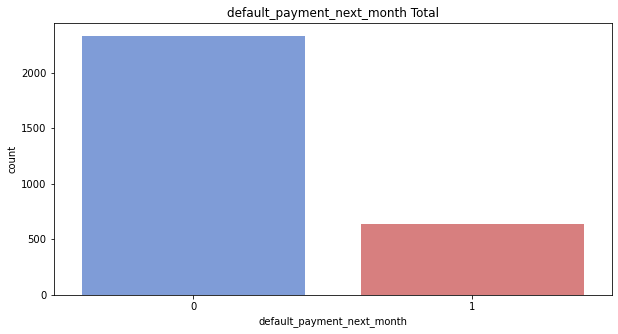

In [9]:
plt.figure(figsize = (10,5))
sns.countplot(x='default_payment_next_month', data=df, palette=['#7097e6','#e67070'])
plt.title('default_payment_next_month Total')
plt.show()

In [10]:
df['default_payment_next_month'].value_counts()

0    2330
1     635
Name: default_payment_next_month, dtype: int64

Credit card defaults occur when people become very delinquent on the credit card payments. Based on the information above, in the default payment next month, total of value 0 (0=no) is 2330 while total of value 1 (1=yes) is 635. It means there are 635 people stop making required payment on a loan/debt while the rest is still pay the required loan/debt on time. From the difference in the amount the data can be categorized as imbalanced data.

<AxesSubplot:xlabel='sex', ylabel='count'>

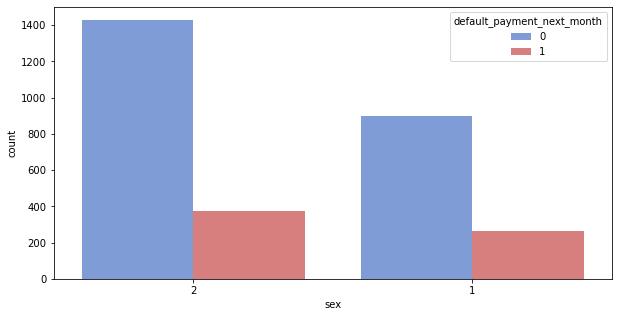

In [11]:
plt.figure(figsize = (10,5))
sns.countplot(x='sex', data=df, order = df.sex.value_counts().index, hue='default_payment_next_month', palette=['#7097e6','#e67070'])

In [12]:
pd.DataFrame(df.groupby(['sex','default_payment_next_month'])['default_payment_next_month'].count())

default_payment_next_month
sex default_payment_next_month                            
1   0                                                  901
    1                                                  262
2   0                                                 1429
    1                                                  373

Description : Sex (1=male, 2=female)

Mostly, in the dataset, female are more likely to do loan/debt more than male. But if based on the propotion, male most likely failed to pay the loan. The precentage of woman who paid their loan is 79,3% while the precentage of male who paid their loan is 77,4%.

<AxesSubplot:xlabel='education_level', ylabel='count'>

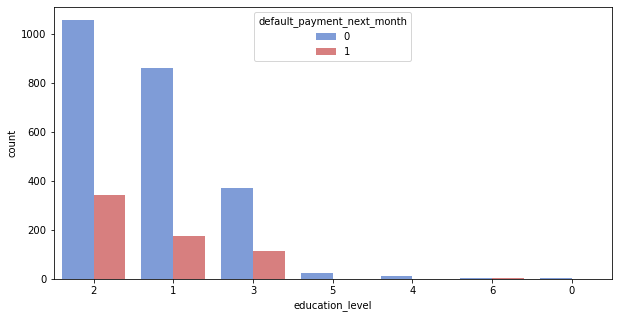

In [13]:
plt.figure(figsize = (10,5))
sns.countplot(x='education_level', data=df, order = df.education_level.value_counts().index, hue='default_payment_next_month', palette=['#7097e6','#e67070'])

In [14]:
pd.DataFrame(df.groupby(['education_level','default_payment_next_month'])['default_payment_next_month'].count())

default_payment_next_month
education_level default_payment_next_month                            
0               0                                                    2
1               0                                                  862
                1                                                  177
2               0                                                 1058
                1                                                  342
3               0                                                  370
                1                                                  113
4               0                                                   13
5               0                                                   23
                1                                                    1
6               0                                                    2
                1                                                    2

Description : Education Level (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

Most of the default payments, which are yes and no, mostly happen by university or undergraduates, followed by graduate schools, high schools, unknowns, and others. It is possible that the university is usually the level of education that most people desired. The expenses can be a lot because the majority of them go to college as requirement of decent job along with carrying large of student loans. Also after graduation there are many other expenses such as housing, vehicles, staple goods or even some of them decide to have families. This also applies to those from graduate school. It is quite impressive the amount of graduate school (master) almost in the same amount from university. Besides that, there are some ambiguous values. It is not known what falls into the other category, it could be pre-school, middle school, no school, and others. 

Meanwhile, for the unknown, 2 values are defined, namely 5 and 6, which maybe this value should be combine into one value. The last one is 0, it could be that this value could mean null('unknown') or the person has no education background at all. Three of those values will be change into mode so that later the value range are 1 = undergraduate school, 2 = university, 3 = high school, and 4 = other. 

<AxesSubplot:xlabel='marital_status', ylabel='count'>

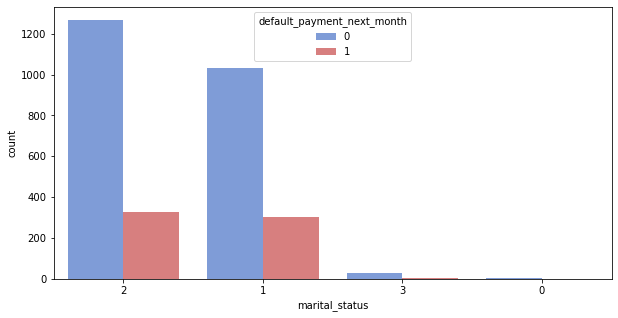

In [15]:
plt.figure(figsize = (10,5))
sns.countplot(x='marital_status', data=df, order = df.marital_status.value_counts().index, hue='default_payment_next_month', palette=['#7097e6','#e67070'])

In [16]:
pd.DataFrame(df.groupby(['marital_status','default_payment_next_month'])['default_payment_next_month'].count())

default_payment_next_month
marital_status default_payment_next_month                            
0              0                                                    4
1              0                                                 1030
               1                                                  302
2              0                                                 1267
               1                                                  327
3              0                                                   29
               1                                                    6

Description : Marital status (1=married, 2=single, 3=others)


In marital status, the most default payment owner fall to single people while the lowest is others. It is still not known what the other means, such as whether widowed, divorced, separated, registered partnerships are included in this category. As before, there are those that have a value of 0. This value of 0 is very few in number and will also be replaced with a mode on marital status so that later the range will only have 1=married, 2=single, and 3=others.

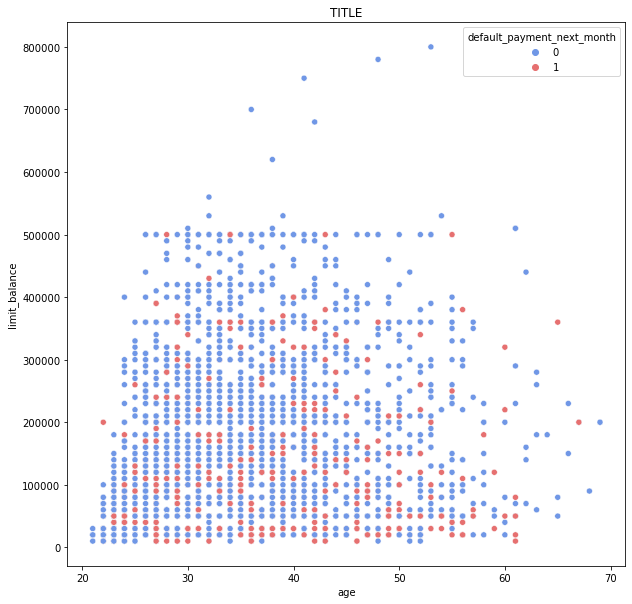

In [17]:
plt.figure(figsize = (10,10))
sns.scatterplot(x='age', y='limit_balance', data=df, hue='default_payment_next_month', palette=['#7097e6','#e67070'])
plt.title('TITLE')
plt.show()

Whatever the age does not affect the balance limit. It can be proven from the distribution of the points above which is quite random. Another factors such as income, creditworthiness, payment history, an others factor may affect personal limit balance.

<AxesSubplot:xlabel='pay_1', ylabel='count'>

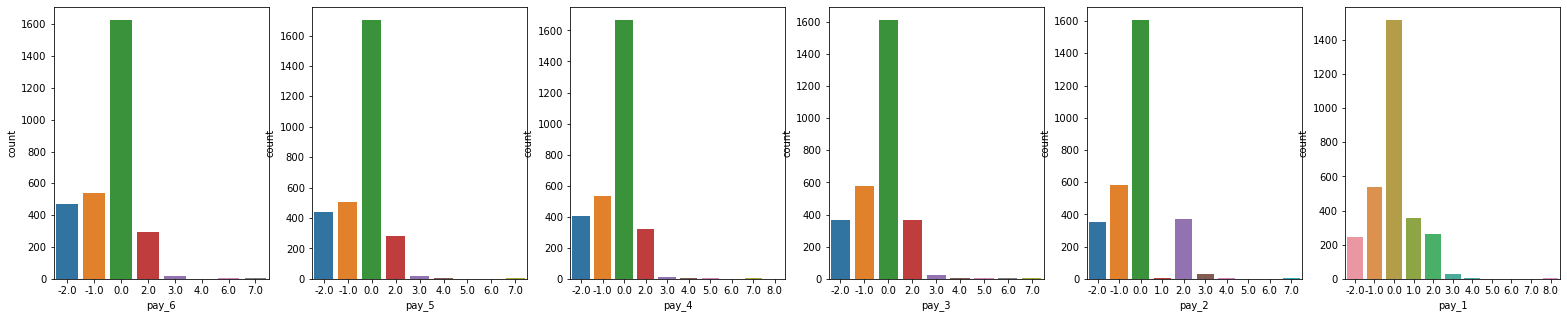

In [18]:
fig, ax =plt.subplots(1,6, figsize = (27,5)) #df[['pay_6','pay_5','pay_4','pay_3','pay_2','pay_1']]
sns.countplot(x='pay_6', data=df, ax=ax[0])
sns.countplot(x='pay_5', data=df, ax=ax[1])
sns.countplot(x='pay_4', data=df, ax=ax[2])
sns.countplot(x='pay_3', data=df, ax=ax[3])
sns.countplot(x='pay_2', data=df, ax=ax[4])
sns.countplot(x='pay_1', data=df, ax=ax[5])

In [19]:
df[(df['default_payment_next_month'] == 1)]

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
13,20000.0,1,2,2,24.0,0.0,0.0,0.0,0.0,0.0,0.0,6215.0,7252.0,8473.0,9769.0,10057.0,10346.0,1300.0,1500.0,1600.0,600.0,600.0,700.0,1
14,230000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0.0,0.0,301038.0,305327.0,213058.0,216260.0,215968.0,174195.0,9405.0,7769.0,7757.0,8030.0,6549.0,5226.0,1
18,20000.0,2,2,2,25.0,0.0,0.0,0.0,0.0,0.0,0.0,18825.0,18545.0,18606.0,18904.0,19433.0,18902.0,1300.0,1613.0,1301.0,830.0,698.0,822.0,1
30,120000.0,2,1,2,29.0,0.0,0.0,0.0,2.0,0.0,0.0,6385.0,9262.0,11793.0,11307.0,14102.0,15871.0,3000.0,2691.0,0.0,3000.0,2000.0,0.0,1
32,80000.0,2,2,2,25.0,0.0,0.0,0.0,0.0,0.0,0.0,81003.0,85894.0,87061.0,89008.0,93523.0,80288.0,8213.0,3491.0,3508.0,19523.0,3288.0,1570.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2941,150000.0,2,1,1,38.0,-1.0,-1.0,-2.0,-2.0,-2.0,-1.0,750.0,0.0,0.0,0.0,0.0,2040.0,0.0,0.0,0.0,0.0,2040.0,13061.0,1
2946,20000.0,2,2,1,38.0,1.0,-1.0,-1.0,-2.0,-2.0,-2.0,0.0,2000.0,0.0,0.0,0.0,0.0,2000.0,0.0,0.0,0.0,0.0,0.0,1
2950,360000.0,2,1,1,48.0,1.0,-1.0,-1.0,-2.0,-2.0,-2.0,491.0,3670.0,-114.0,-200.0,-200.0,-200.0,3700.0,0.0,0.0,0.0,0.0,0.0,1
2951,430000.0,1,2,1,32.0,1.0,-1.0,-1.0,-2.0,-2.0,-2.0,0.0,2500.0,0.0,0.0,0.0,0.0,2500.0,0.0,0.0,0.0,0.0,0.0,1


Description : Payment (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

If based on the description of current payment delay, there are ambiguous values, namely -2 and 0. From the description, -1 means pay duly, 1 means delay for one month, 2 means delay for 2 months and so on. In the data values that do not have information, there are quite a lot of 0 and -2 values. This ambiguity causes the graph and the results to be a little difficult to draw conclusions. But if we interpret with description :

(-2 = pay duly 2 month before due, -1 = pay duly 1 month before due, 0 = no delay (on due time), 1 = payment delay for one month, 2 = payment delay for two months, ... 8=payment delay for eight months)

Then the interpretation can be that mostly people paid their loan/debt to bank on time. Some of them paid the due even earlier.  Most people prefer to not getting any additional charge.


<AxesSubplot:>

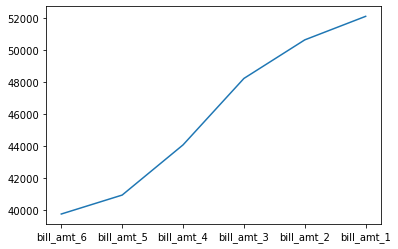

In [20]:
df[['bill_amt_6','bill_amt_5','bill_amt_4','bill_amt_3','bill_amt_2','bill_amt_1']].mean().plot()

In [21]:
df[['bill_amt_1','bill_amt_2','bill_amt_3','bill_amt_4','bill_amt_5','bill_amt_6']].mean()

bill_amt_1    52118.305228
bill_amt_2    50649.153120
bill_amt_3    48239.757504
bill_amt_4    44089.683305
bill_amt_5    40956.080607
bill_amt_6    39773.072513
dtype: float64

Our hypothesis on this case:

**H0: μ_april = μ_september**

**H1: μ_april != μ_september**

In [22]:
bill_amt_sept = pd.DataFrame(df['bill_amt_1'])
bill_amt_april = pd.DataFrame(df['bill_amt_6'])

# One Sample Two Tailed Hypothesis
t_stat, p_val = stats.ttest_ind(bill_amt_april, bill_amt_sept)

print('P-value:',p_val[0])
print('t-statistics:',t_stat[0],'\n')

if p_val < 0.05:
    print('Reject H0, there there is a significant difference between bill amount of April and September.')
else:
    print('Failed to Reject H0, There is no significant difference between bill amount of April and September.')

P-value: 3.641938858452054e-13
t-statistics: -7.284773943371937 

Reject H0, there there is a significant difference between bill amount of April and September.


The graph above shows the amount of bill statements from April to September 2005. There have been additional bill statements during the last 6 months. When examined, there are significant changes from April and September. This means the number of bills from month to month for each person is getting larget.

<AxesSubplot:>

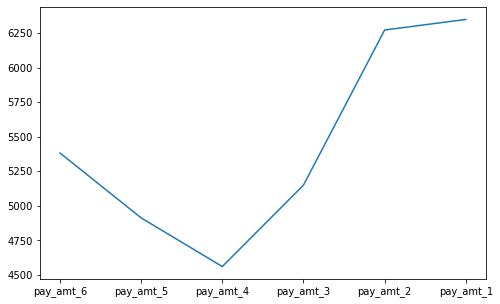

In [23]:
plt.figure(figsize = (8,5))
df[['pay_amt_6','pay_amt_5','pay_amt_4','pay_amt_3','pay_amt_2','pay_amt_1']].mean().plot()

In [24]:
df[['pay_amt_6','pay_amt_5','pay_amt_4','pay_amt_3','pay_amt_2','pay_amt_1']].mean()

pay_amt_6    5382.701518
pay_amt_5    4913.286678
pay_amt_4    4561.376054
pay_amt_3    5150.497133
pay_amt_2    6272.494435
pay_amt_1    6348.902867
dtype: float64

Meanwhile, the amount of previous payments in April to September graphically decreased and increased. In the chart above, we can see that the month of April the amount paid up to June. However, it increased dramatically from June to September.

# 5 - Data Prepocessing

## Get Inference

In [25]:
# Get Data for Model Inference

df_inf = df.sample(10, random_state = 57) #change random state
df_inf

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
1075,400000.0,2,1,2,30.0,0.0,0.0,0.0,0.0,0.0,0.0,139862.0,125280.0,109278.0,94511.0,64995.0,28654.0,9209.0,3807.0,2403.0,1933.0,1014.0,104078.0,0
1155,340000.0,1,1,2,44.0,0.0,0.0,0.0,0.0,0.0,0.0,83059.0,85634.0,73950.0,59324.0,156094.0,110234.0,20000.0,5000.0,2000.0,112000.0,4234.0,4000.0,1
1437,20000.0,1,2,2,36.0,0.0,0.0,2.0,2.0,3.0,2.0,11423.0,13976.0,13455.0,15227.0,14699.0,14313.0,2749.0,0.0,2000.0,0.0,0.0,1230.0,0
2172,100000.0,2,1,1,36.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,16155.0,3514.0,3400.0,15156.0,13920.0,2099.0,3514.0,3400.0,15156.0,13920.0,2099.0,15638.0,0
1815,70000.0,1,3,1,46.0,2.0,2.0,2.0,2.0,2.0,2.0,29258.0,31137.0,32855.0,33316.0,34137.0,33439.0,2352.0,2531.0,1300.0,1500.0,0.0,1400.0,1
2755,430000.0,2,1,2,38.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,590.0,590.0,590.0,590.0,590.0,590.0,590.0,590.0,590.0,590.0,590.0,590.0,0
323,90000.0,2,3,1,33.0,0.0,0.0,0.0,0.0,0.0,0.0,86960.0,85585.0,87235.0,84511.0,84488.0,86184.0,3200.0,3114.0,3000.0,3100.0,3100.0,3500.0,1
1373,30000.0,2,2,2,28.0,0.0,0.0,0.0,0.0,2.0,2.0,28347.0,29880.0,29588.0,30687.0,25637.0,26468.0,2000.0,2000.0,2200.0,0.0,1800.0,0.0,0
245,300000.0,2,2,1,42.0,0.0,0.0,0.0,0.0,0.0,0.0,281000.0,291482.0,297425.0,296884.0,241037.0,247383.0,15000.0,12039.0,13000.0,9000.0,10059.0,10000.0,0
202,170000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0.0,0.0,171160.0,187853.0,171095.0,137986.0,141319.0,139463.0,13000.0,6154.0,15000.0,6000.0,7000.0,5000.0,0


In [26]:
# Remove Inference-Set from dataset

df_train_test = df.drop(df_inf.index)
df_train_test

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0.0,0.0,47174.0,47974.0,48630.0,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0.0,0.0,48088.0,45980.0,44231.0,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0.0,0.0,78630.0,68921.0,46512.0,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0.0,0.0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0.0,0.0,42058.0,35340.0,22110.0,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2.0,-1.0,44100.0,0.0,28428.0,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2.0,-1.0,280.0,6852.0,486.0,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2.0,-2.0,0.0,47.0,207.0,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2.0,-1.0,0.0,2920.0,0.0,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1


In [27]:
# Reset Index (Minimalizing error)

df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)
df_inf

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,400000.0,2,1,2,30.0,0.0,0.0,0.0,0.0,0.0,0.0,139862.0,125280.0,109278.0,94511.0,64995.0,28654.0,9209.0,3807.0,2403.0,1933.0,1014.0,104078.0,0
1,340000.0,1,1,2,44.0,0.0,0.0,0.0,0.0,0.0,0.0,83059.0,85634.0,73950.0,59324.0,156094.0,110234.0,20000.0,5000.0,2000.0,112000.0,4234.0,4000.0,1
2,20000.0,1,2,2,36.0,0.0,0.0,2.0,2.0,3.0,2.0,11423.0,13976.0,13455.0,15227.0,14699.0,14313.0,2749.0,0.0,2000.0,0.0,0.0,1230.0,0
3,100000.0,2,1,1,36.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,16155.0,3514.0,3400.0,15156.0,13920.0,2099.0,3514.0,3400.0,15156.0,13920.0,2099.0,15638.0,0
4,70000.0,1,3,1,46.0,2.0,2.0,2.0,2.0,2.0,2.0,29258.0,31137.0,32855.0,33316.0,34137.0,33439.0,2352.0,2531.0,1300.0,1500.0,0.0,1400.0,1
5,430000.0,2,1,2,38.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,590.0,590.0,590.0,590.0,590.0,590.0,590.0,590.0,590.0,590.0,590.0,590.0,0
6,90000.0,2,3,1,33.0,0.0,0.0,0.0,0.0,0.0,0.0,86960.0,85585.0,87235.0,84511.0,84488.0,86184.0,3200.0,3114.0,3000.0,3100.0,3100.0,3500.0,1
7,30000.0,2,2,2,28.0,0.0,0.0,0.0,0.0,2.0,2.0,28347.0,29880.0,29588.0,30687.0,25637.0,26468.0,2000.0,2000.0,2200.0,0.0,1800.0,0.0,0
8,300000.0,2,2,1,42.0,0.0,0.0,0.0,0.0,0.0,0.0,281000.0,291482.0,297425.0,296884.0,241037.0,247383.0,15000.0,12039.0,13000.0,9000.0,10059.0,10000.0,0
9,170000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0.0,0.0,171160.0,187853.0,171095.0,137986.0,141319.0,139463.0,13000.0,6154.0,15000.0,6000.0,7000.0,5000.0,0


## Feature Selection

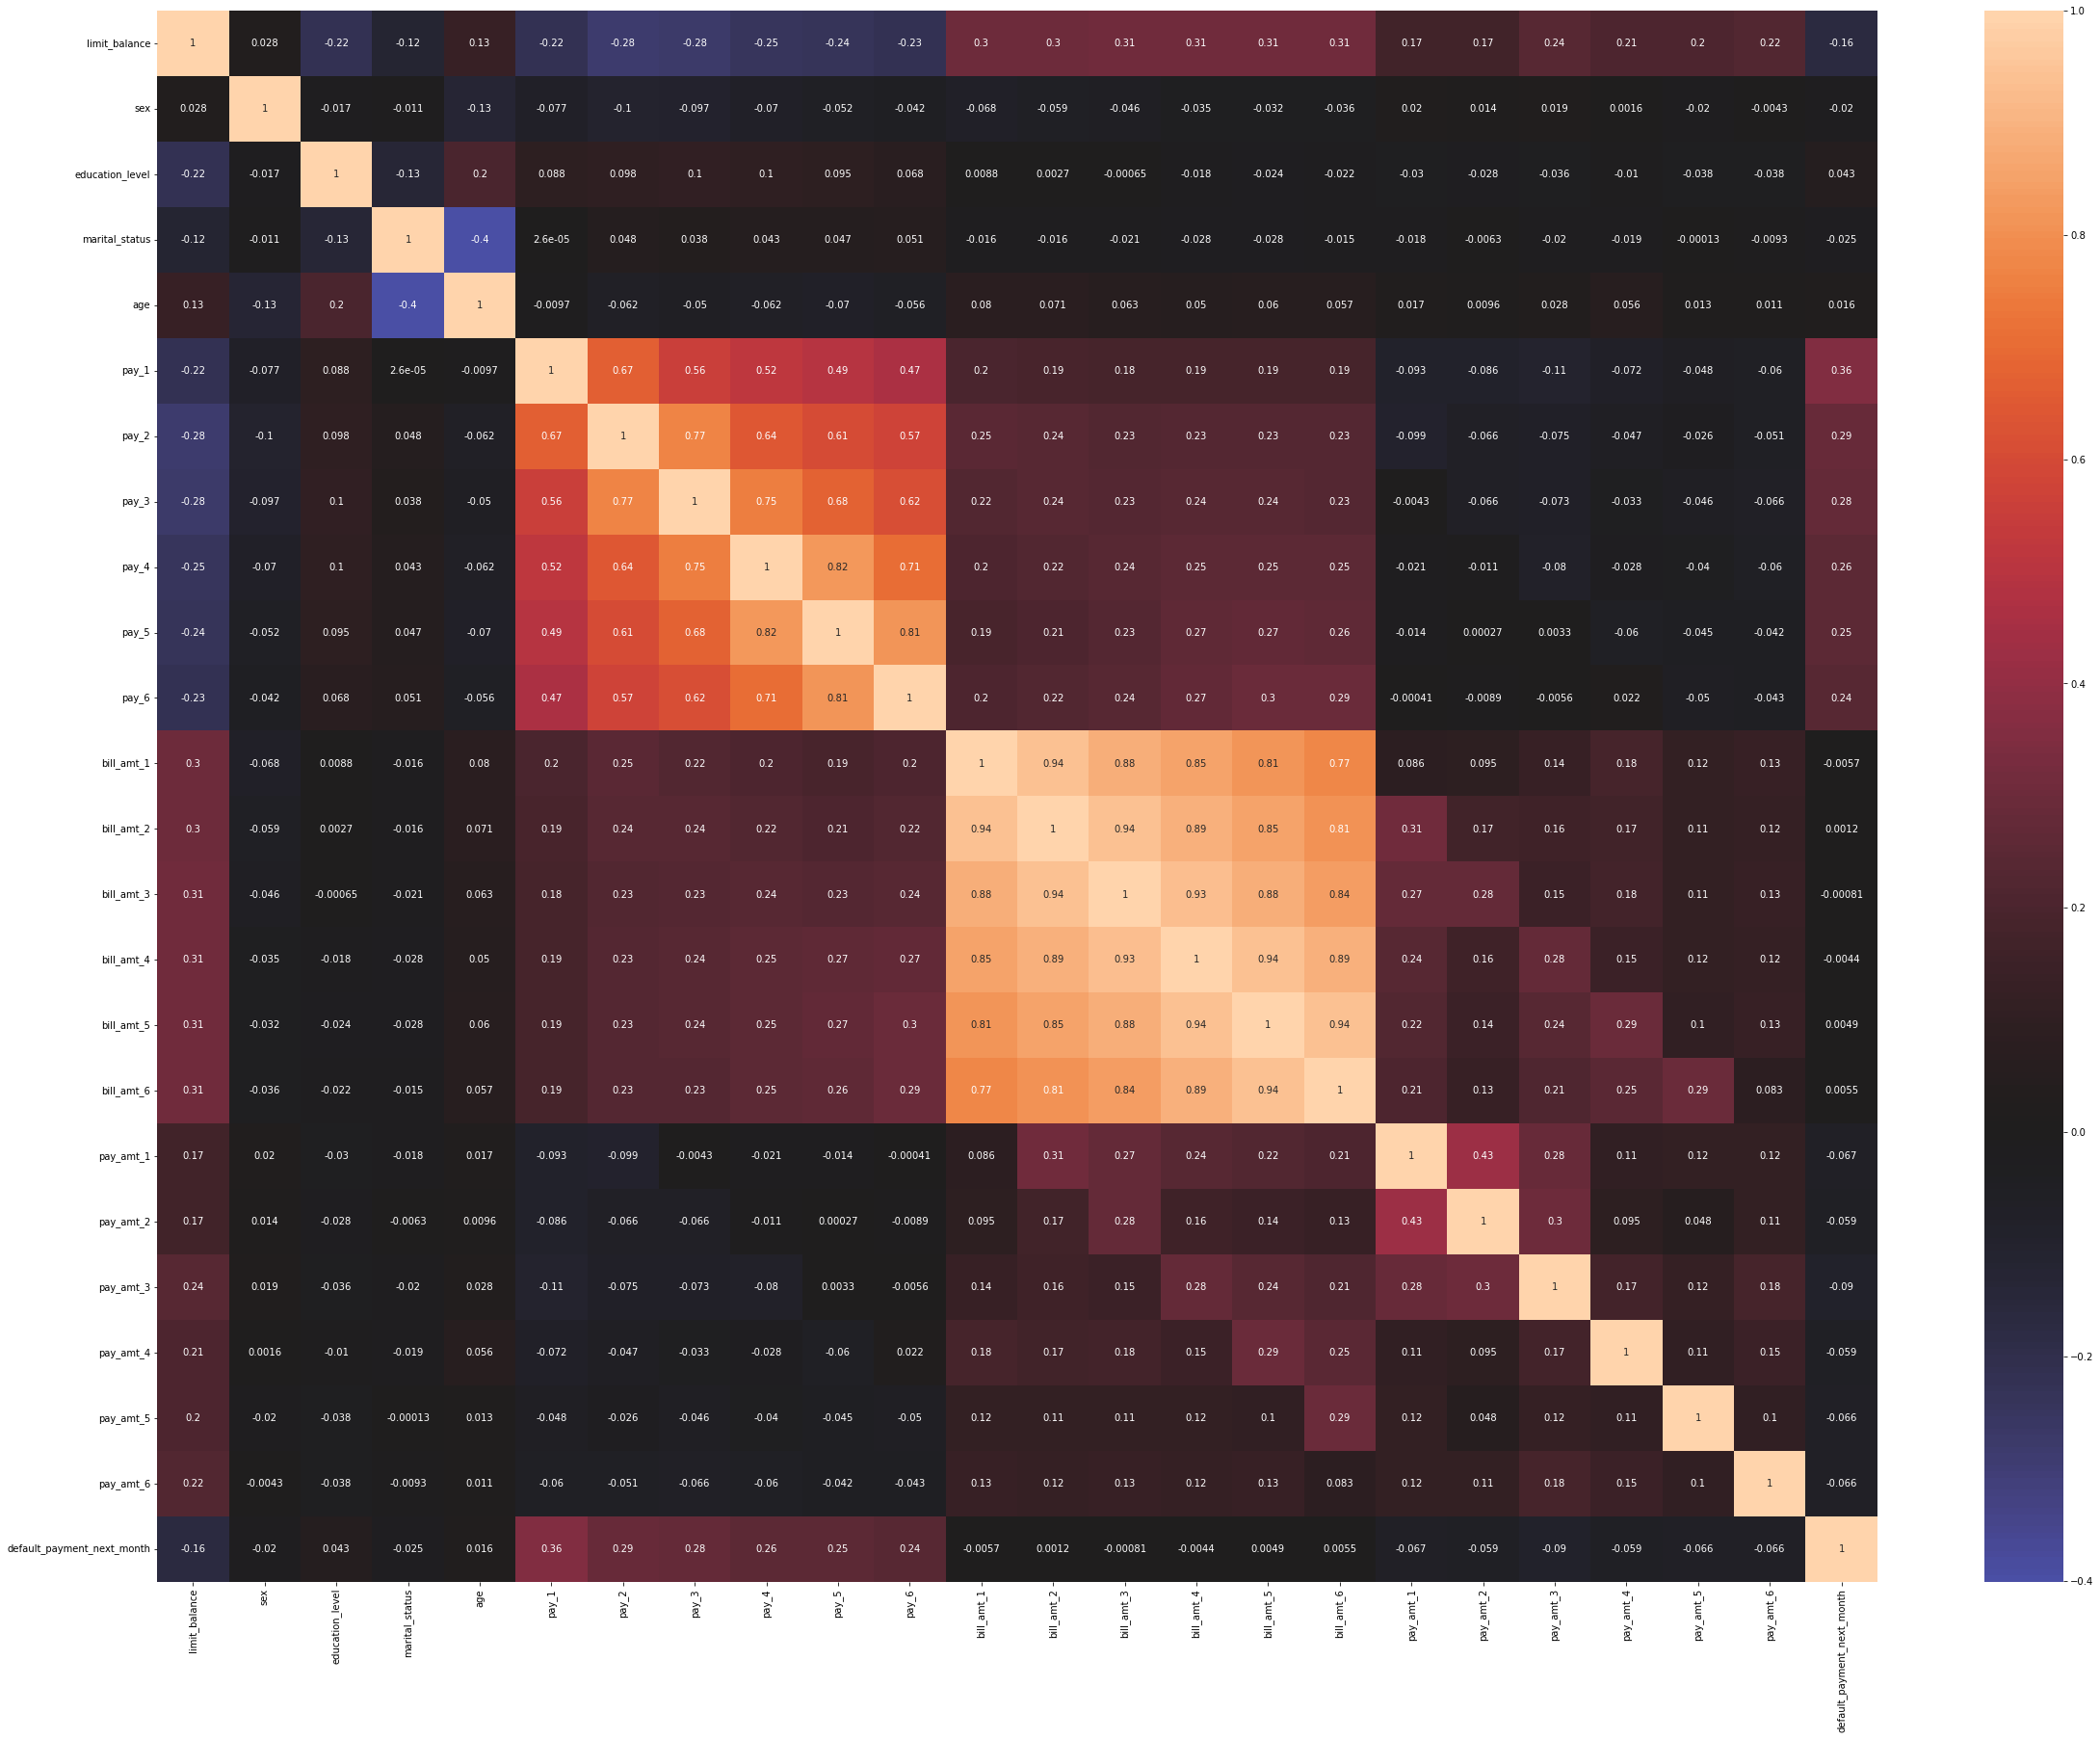

In [28]:
# Display Heatmap

train_test_corr = df_train_test.corr()

plt.figure(figsize=(40, 30))
sns.heatmap(train_test_corr, annot= True, center=0)
plt.show()

In [29]:
# Display all columns

df_train_test.columns

Index(['limit_balance', 'sex', 'education_level', 'marital_status', 'age',
       'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6', 'default_payment_next_month'],
      dtype='object')

Based on the correlation in the heatmap above, there are only several variable which considered correlated enough with default payment, those variables are pay_1, pay_2, pay_3, pay_4, pay_5, and pay_6. In this case, the features to predicting default payment next month, the used variables are:
- Education_level, in several cases it affected the default payment.
- Age, the ability to pay someone can't/can be seen from his age but sometimes the older usually considered to be able to pay the loan.
- limit_balance, the amout of given credit affect individual ability to use the balance as much as the limit
- marital_status, in several case, married or not married can affect payment default
- pay_1 - pay_6 : Based on the heatmap above, these six variables have a fairly high correlation among other variables. A late payment is the biggest factor n individual credit report.
- bill_amt_1 - bill_amt_6, bill amount gave information how much bill spent by individual in that month, in several case the amount people owe can affect people credit score.
- pay_amt_1 - pay_amt_6, pay amount give information how much payment done by individual in that month, in several case Payment History can affect people credit score.

Variables which not included as features :
- sex, Not really affected the default payment. Only defining individual sex.


In [30]:
# Drop the unecessary columns

dropped_col_df = df_train_test.drop([
       'sex'],axis=1)
# dropped_col_df = df_train_test

## Splitting between 'X' (Features) and 'y' (Target)

In [31]:
# Splitting Features and Target

X = dropped_col_df.drop('default_payment_next_month', axis = 1)
y = dropped_col_df['default_payment_next_month']

X

,limit_balance,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,50000.0,1,2,39.0,0.0,0.0,0.0,0.0,0.0,0.0,47174.0,47974.0,48630.0,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0
1,110000.0,1,2,29.0,0.0,0.0,0.0,0.0,0.0,0.0,48088.0,45980.0,44231.0,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0
2,270000.0,1,2,36.0,0.0,0.0,0.0,2.0,0.0,0.0,78630.0,68921.0,46512.0,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0
3,130000.0,1,1,45.0,0.0,0.0,0.0,0.0,0.0,0.0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0
4,50000.0,1,2,24.0,0.0,0.0,0.0,0.0,0.0,0.0,42058.0,35340.0,22110.0,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2950,210000.0,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2.0,-1.0,44100.0,0.0,28428.0,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0
2951,280000.0,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2.0,-1.0,280.0,6852.0,486.0,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0
2952,80000.0,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2.0,-2.0,0.0,47.0,207.0,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0
2953,200000.0,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2.0,-1.0,0.0,2920.0,0.0,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0


In [32]:
# Splitting train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=13) 

# Checking train and test size

print('Features Train Size : ', X_train.shape,', Target Train Size : ', y_train.shape)
print('Features Test Size : ', X_test.shape,', Target Test Size : ', y_test.shape)

Features Train Size :  (2364, 22) , Target Train Size :  (2364,)
Features Test Size :  (591, 22) , Target Test Size :  (591,)


## Handling Missing Values

### Features Train

In [33]:
# Checking missing value in features train

X_train.isnull().sum()

limit_balance      0
education_level    0
marital_status     0
age                0
pay_1              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

Previously there were values 0, 5, and 6 on education_level and 0 on marital_status. These values are considered as missing values and the value will be replaced with the mode.

In [34]:
# Combine values in Education Level

X_train.loc[X_train["education_level"] == 0, "education_level"] = X_train["education_level"].mode()
X_train.loc[X_train["education_level"] == 5, "education_level"] = X_train["education_level"].mode()
X_train.loc[X_train["education_level"] == 6, "education_level"] = X_train["education_level"].mode()

# Change values in marital status

X_train.loc[X_train["marital_status"] == 0, "marital_status"] = X_train["marital_status"].mode()


### Features Test

In [35]:
# Checking missing value in features test

X_test.isnull().sum()

limit_balance      0
education_level    0
marital_status     0
age                0
pay_1              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

In [36]:
X_test["education_level"].mode()

0    2
Name: education_level, dtype: int64

Value changes are also made to the features test.

In [37]:
# Combine values in Education Level

X_test.loc[X_test["education_level"] == 0, "education_level"] = X_test["education_level"].mode()
X_test.loc[X_test["education_level"] == 5, "education_level"] = X_test["education_level"].mode()
X_test.loc[X_test["education_level"] == 6, "education_level"] = X_test["education_level"].mode()

# Change values in marital status

X_test.loc[X_test["marital_status"] == 0, "marital_status"] = X_test["marital_status"].mode()


### Target Train

In [38]:
# Checking missing value in target train

y_train.isnull().sum()

0

### Target Test

In [39]:
# Checking missing value in target test

y_test.isnull().sum()

0

## Handling Outlier

In certain model, there are algorithm which sensitive towards outlier such as SCV, so all the numerical data outlier will be handle by winsorizing (unless numerical data which supposed to be categorical data such as sex, education level, marital status)

### Limit Balance and Age

<AxesSubplot:title={'center':'age distribution'}>

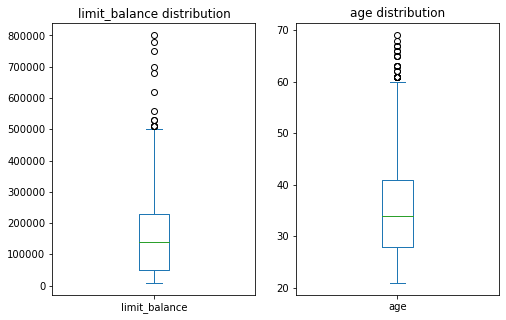

In [40]:
fig, ax =plt.subplots(1,2, figsize = (8,5))
X_train['limit_balance'].plot(kind='box', title='limit_balance distribution', ax=ax[0])
X_train['age'].plot(kind='box', title='age distribution', ax=ax[1])



In [41]:
# Calculating iqr

X_train_limit_balance_q3, X_train_limit_balance_q1 = np.percentile(X_train['limit_balance'], [75 ,25])
X_train_limit_balance_iqr = X_train_limit_balance_q3 - X_train_limit_balance_q1
max_X_train_limit_balance_iqr = X_train_limit_balance_q3 + 1.5 * X_train_limit_balance_iqr
print('limit_balance max IQR = ', max_X_train_limit_balance_iqr)

X_train_winso_limit_balance = X_train['limit_balance'].copy() 

# Replace the Value with Upper Boundaries

X_train_winso_limit_balance.loc[X_train_winso_limit_balance> max_X_train_limit_balance_iqr] = max_X_train_limit_balance_iqr

# Checking the previous max

print('limit_balance max before winsorizing = ', X_train['limit_balance'].max())

# Checking the current max

print('limit_balance max after winsorizing = ', X_train_winso_limit_balance.max())


limit_balance max IQR =  500000.0
limit_balance max before winsorizing =  800000.0
limit_balance max after winsorizing =  500000.0


In [42]:
# Calculating iqr

X_train_age_q3, X_train_age_q1 = np.percentile(X_train['age'], [75 ,25])
X_train_age_iqr = X_train_age_q3 - X_train_age_q1
max_X_train_age_iqr = X_train_age_q3 + 1.5 * X_train_age_iqr
print('age max IQR = ', max_X_train_age_iqr)

X_train_winso_age = X_train['age'].copy() 

# Replace the Value with Upper Boundaries

X_train_winso_age.loc[X_train_winso_age> max_X_train_age_iqr] = max_X_train_age_iqr

# Checking the previous max

print('age max before winsorizing = ', X_train['age'].max())

# Checking the current max

print('age max after winsorizing = ', X_train_winso_age.max())

age max IQR =  60.5
age max before winsorizing =  69.0
age max after winsorizing =  60.5


### Bill Amount

<AxesSubplot:title={'center':'bill_amt_6 distribution'}>

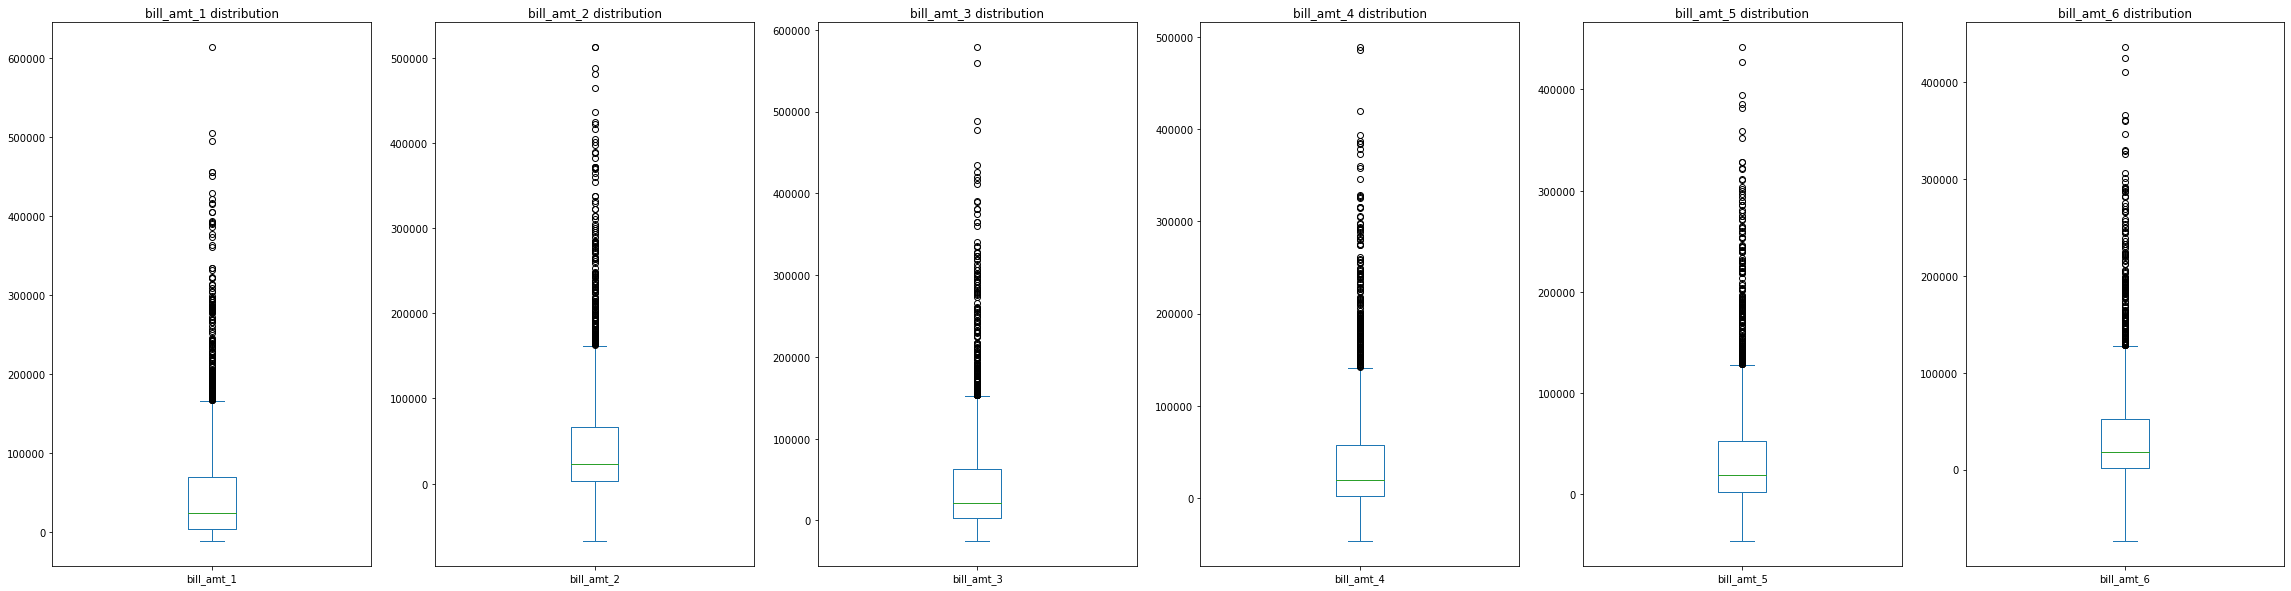

In [43]:
fig, ax =plt.subplots(1,6, figsize = (40,10))
X_train['bill_amt_1'].plot(kind='box', title='bill_amt_1 distribution',ax=ax[0])
X_train['bill_amt_2'].plot(kind='box', title='bill_amt_2 distribution',ax=ax[1])
X_train['bill_amt_3'].plot(kind='box', title='bill_amt_3 distribution',ax=ax[2])
X_train['bill_amt_4'].plot(kind='box', title='bill_amt_4 distribution',ax=ax[3])
X_train['bill_amt_5'].plot(kind='box', title='bill_amt_5 distribution',ax=ax[4])
X_train['bill_amt_6'].plot(kind='box', title='bill_amt_6 distribution',ax=ax[5])



In [44]:
X_train_bill_amt_1_skew = X_train['bill_amt_1'].skew()
X_train_bill_amt_2_skew = X_train['bill_amt_2'].skew()
X_train_bill_amt_3_skew = X_train['bill_amt_3'].skew()
X_train_bill_amt_4_skew = X_train['bill_amt_4'].skew()
X_train_bill_amt_5_skew = X_train['bill_amt_5'].skew()
X_train_bill_amt_6_skew = X_train['bill_amt_6'].skew()

print('bill_amt_1 Skewness = ', X_train_bill_amt_1_skew)
print('bill_amt_2 Skewness = ', X_train_bill_amt_2_skew)
print('bill_amt_3 Skewness = ', X_train_bill_amt_3_skew)
print('bill_amt_4 Skewness = ', X_train_bill_amt_4_skew)
print('bill_amt_5 Skewness = ', X_train_bill_amt_5_skew)
print('bill_amt_6 Skewness = ', X_train_bill_amt_6_skew)

bill_amt_1 Skewness =  2.4821727406387804
bill_amt_2 Skewness =  2.4814559981149458
bill_amt_3 Skewness =  2.6135723592450857
bill_amt_4 Skewness =  2.5121898189139857
bill_amt_5 Skewness =  2.4807149248425313
bill_amt_6 Skewness =  2.473685004722838


In [45]:
# Calculating iqr

X_train_bill_amt_1_q3, X_train_bill_amt_1_q1 = np.percentile(X_train['bill_amt_1'], [75 ,25])
X_train_bill_amt_2_q3, X_train_bill_amt_2_q1 = np.percentile(X_train['bill_amt_2'], [75 ,25])
X_train_bill_amt_3_q3, X_train_bill_amt_3_q1 = np.percentile(X_train['bill_amt_3'], [75 ,25])
X_train_bill_amt_4_q3, X_train_bill_amt_4_q1 = np.percentile(X_train['bill_amt_4'], [75 ,25])
X_train_bill_amt_5_q3, X_train_bill_amt_5_q1 = np.percentile(X_train['bill_amt_5'], [75 ,25])
X_train_bill_amt_6_q3, X_train_bill_amt_6_q1 = np.percentile(X_train['bill_amt_6'], [75 ,25])

X_train_bill_amt_1_iqr = X_train_bill_amt_1_q3 - X_train_bill_amt_1_q1
X_train_bill_amt_2_iqr = X_train_bill_amt_2_q3 - X_train_bill_amt_2_q1
X_train_bill_amt_3_iqr = X_train_bill_amt_3_q3 - X_train_bill_amt_3_q1
X_train_bill_amt_4_iqr = X_train_bill_amt_4_q3 - X_train_bill_amt_4_q1
X_train_bill_amt_5_iqr = X_train_bill_amt_5_q3 - X_train_bill_amt_5_q1
X_train_bill_amt_6_iqr = X_train_bill_amt_6_q3 - X_train_bill_amt_6_q1

max_X_train_bill_amt_1_iqr = X_train_bill_amt_1_q3 + 1.5 * X_train_bill_amt_1_iqr
max_X_train_bill_amt_2_iqr = X_train_bill_amt_2_q3 + 1.5 * X_train_bill_amt_2_iqr
max_X_train_bill_amt_3_iqr = X_train_bill_amt_3_q3 + 1.5 * X_train_bill_amt_3_iqr
max_X_train_bill_amt_4_iqr = X_train_bill_amt_4_q3 + 1.5 * X_train_bill_amt_4_iqr
max_X_train_bill_amt_5_iqr = X_train_bill_amt_5_q3 + 1.5 * X_train_bill_amt_5_iqr
max_X_train_bill_amt_6_iqr = X_train_bill_amt_6_q3 + 1.5 * X_train_bill_amt_6_iqr

print('bill_amt_1 max IQR = ', max_X_train_bill_amt_1_iqr)
print('bill_amt_2 max IQR = ', max_X_train_bill_amt_2_iqr)
print('bill_amt_3 max IQR = ', max_X_train_bill_amt_3_iqr)
print('bill_amt_4 max IQR = ', max_X_train_bill_amt_4_iqr)
print('bill_amt_5 max IQR = ', max_X_train_bill_amt_5_iqr)
print('bill_amt_6 max IQR = ', max_X_train_bill_amt_6_iqr)


X_train_winso_bill_amt_1 = X_train['bill_amt_1'].copy() 
X_train_winso_bill_amt_2 = X_train['bill_amt_2'].copy()
X_train_winso_bill_amt_3 = X_train['bill_amt_3'].copy() 
X_train_winso_bill_amt_4 = X_train['bill_amt_4'].copy() 
X_train_winso_bill_amt_5 = X_train['bill_amt_5'].copy() 
X_train_winso_bill_amt_6 = X_train['bill_amt_6'].copy() 

# Replace the Value with Upper Boundaries

X_train_winso_bill_amt_1.loc[X_train_winso_bill_amt_1> max_X_train_bill_amt_1_iqr] = max_X_train_bill_amt_1_iqr
X_train_winso_bill_amt_2.loc[X_train_winso_bill_amt_2 > max_X_train_bill_amt_2_iqr] = max_X_train_bill_amt_2_iqr
X_train_winso_bill_amt_3.loc[X_train_winso_bill_amt_3> max_X_train_bill_amt_3_iqr] = max_X_train_bill_amt_3_iqr
X_train_winso_bill_amt_4.loc[X_train_winso_bill_amt_4 > max_X_train_bill_amt_4_iqr] = max_X_train_bill_amt_4_iqr
X_train_winso_bill_amt_5.loc[X_train_winso_bill_amt_5> max_X_train_bill_amt_5_iqr] = max_X_train_bill_amt_5_iqr
X_train_winso_bill_amt_6.loc[X_train_winso_bill_amt_6 > max_X_train_bill_amt_6_iqr] = max_X_train_bill_amt_6_iqr

# Checking the previous max
print('\nbill_amt_1 max after winsorizing = ', X_train_winso_bill_amt_1.max())
print('bill_amt_1 max before winsorizing = ', X_train['bill_amt_1'].max())
print('\nbill_amt_2 max before winsorizing = ', X_train['bill_amt_2'].max())
print('bill_amt_2 max after winsorizing = ', X_train_winso_bill_amt_2.max())
print('\nbill_amt_3 max after winsorizing = ', X_train_winso_bill_amt_3.max())
print('bill_amt_3 max before winsorizing = ', X_train['bill_amt_3'].max())
print('\nbill_amt_4 max after winsorizing = ', X_train_winso_bill_amt_4.max())
print('bill_amt_4 max before winsorizing = ', X_train['bill_amt_4'].max())
print('\nbill_amt_5 max after winsorizing = ', X_train_winso_bill_amt_5.max())
print('bill_amt_5 max before winsorizing = ', X_train['bill_amt_5'].max())
print('\nbill_amt_6 max after winsorizing = ', X_train_winso_bill_amt_6.max())
print('bill_amt_6 max before winsorizing = ', X_train['bill_amt_6'].max())




bill_amt_1 max IQR =  166577.75
bill_amt_2 max IQR =  162366.75
bill_amt_3 max IQR =  152130.375
bill_amt_4 max IQR =  140999.25
bill_amt_5 max IQR =  127895.125
bill_amt_6 max IQR =  127987.375

bill_amt_1 max after winsorizing =  166577.75
bill_amt_1 max before winsorizing =  613860.0

bill_amt_2 max before winsorizing =  512650.0
bill_amt_2 max after winsorizing =  162366.75

bill_amt_3 max after winsorizing =  152130.375
bill_amt_3 max before winsorizing =  578971.0

bill_amt_4 max after winsorizing =  140999.25
bill_amt_4 max before winsorizing =  488808.0

bill_amt_5 max after winsorizing =  127895.125
bill_amt_5 max before winsorizing =  441981.0

bill_amt_6 max after winsorizing =  127987.375
bill_amt_6 max before winsorizing =  436172.0


### Pay Amount

<AxesSubplot:title={'center':'pay_amt_6 distribution'}>

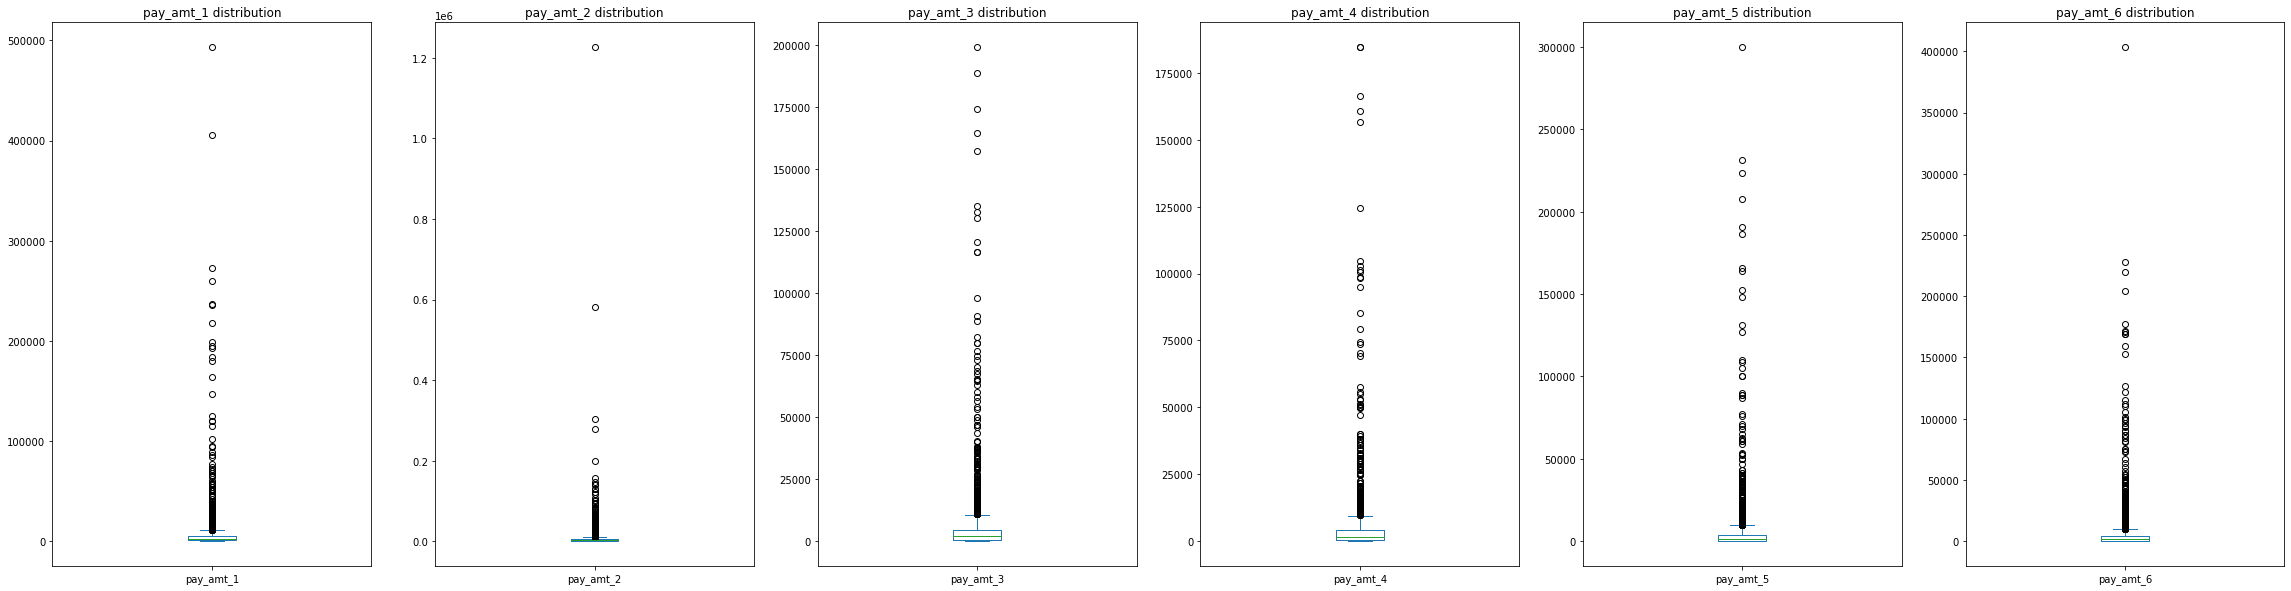

In [46]:
fig, ax =plt.subplots(1,6, figsize = (40,10))
X_train['pay_amt_1'].plot(kind='box', title='pay_amt_1 distribution',ax=ax[0])
X_train['pay_amt_2'].plot(kind='box', title='pay_amt_2 distribution',ax=ax[1])
X_train['pay_amt_3'].plot(kind='box', title='pay_amt_3 distribution',ax=ax[2])
X_train['pay_amt_4'].plot(kind='box', title='pay_amt_4 distribution',ax=ax[3])
X_train['pay_amt_5'].plot(kind='box', title='pay_amt_5 distribution',ax=ax[4])
X_train['pay_amt_6'].plot(kind='box', title='pay_amt_6 distribution',ax=ax[5])



In [47]:
X_train_pay_amt_1_skew = X_train['pay_amt_1'].skew()
X_train_pay_amt_2_skew = X_train['pay_amt_2'].skew()
X_train_pay_amt_3_skew = X_train['pay_amt_3'].skew()
X_train_pay_amt_4_skew = X_train['pay_amt_4'].skew()
X_train_pay_amt_5_skew = X_train['pay_amt_5'].skew()
X_train_pay_amt_6_skew = X_train['pay_amt_6'].skew()

print('pay_amt_1 Skewness = ', X_train_pay_amt_1_skew)
print('pay_amt_2 Skewness = ', X_train_pay_amt_2_skew)
print('pay_amt_3 Skewness = ', X_train_pay_amt_3_skew)
print('pay_amt_4 Skewness = ', X_train_pay_amt_4_skew)
print('pay_amt_5 Skewness = ', X_train_pay_amt_5_skew)
print('pay_amt_6 Skewness = ', X_train_pay_amt_6_skew)

pay_amt_1 Skewness =  11.807265024977616
pay_amt_2 Skewness =  27.428667123591573
pay_amt_3 Skewness =  7.999704037214479
pay_amt_4 Skewness =  8.79234018890977
pay_amt_5 Skewness =  9.549439954178274
pay_amt_6 Skewness =  9.819926008981906


In [48]:
# Calculating iqr

X_train_pay_amt_1_q3, X_train_pay_amt_1_q1 = np.percentile(X_train['pay_amt_1'], [75 ,25])
X_train_pay_amt_2_q3, X_train_pay_amt_2_q1 = np.percentile(X_train['pay_amt_2'], [75 ,25])
X_train_pay_amt_3_q3, X_train_pay_amt_3_q1 = np.percentile(X_train['pay_amt_3'], [75 ,25])
X_train_pay_amt_4_q3, X_train_pay_amt_4_q1 = np.percentile(X_train['pay_amt_4'], [75 ,25])
X_train_pay_amt_5_q3, X_train_pay_amt_5_q1 = np.percentile(X_train['pay_amt_5'], [75 ,25])
X_train_pay_amt_6_q3, X_train_pay_amt_6_q1 = np.percentile(X_train['pay_amt_6'], [75 ,25])

X_train_pay_amt_1_iqr = X_train_pay_amt_1_q3 - X_train_pay_amt_1_q1
X_train_pay_amt_2_iqr = X_train_pay_amt_2_q3 - X_train_pay_amt_2_q1
X_train_pay_amt_3_iqr = X_train_pay_amt_3_q3 - X_train_pay_amt_3_q1
X_train_pay_amt_4_iqr = X_train_pay_amt_4_q3 - X_train_pay_amt_4_q1
X_train_pay_amt_5_iqr = X_train_pay_amt_5_q3 - X_train_pay_amt_5_q1
X_train_pay_amt_6_iqr = X_train_pay_amt_6_q3 - X_train_pay_amt_6_q1

max_X_train_pay_amt_1_iqr = X_train_pay_amt_1_q3 + 1.5 * X_train_pay_amt_1_iqr
max_X_train_pay_amt_2_iqr = X_train_pay_amt_2_q3 + 1.5 * X_train_pay_amt_2_iqr
max_X_train_pay_amt_3_iqr = X_train_pay_amt_3_q3 + 1.5 * X_train_pay_amt_3_iqr
max_X_train_pay_amt_4_iqr = X_train_pay_amt_4_q3 + 1.5 * X_train_pay_amt_4_iqr
max_X_train_pay_amt_5_iqr = X_train_pay_amt_5_q3 + 1.5 * X_train_pay_amt_5_iqr
max_X_train_pay_amt_6_iqr = X_train_pay_amt_6_q3 + 1.5 * X_train_pay_amt_6_iqr

print('pay_amt_1 max IQR = ', max_X_train_pay_amt_1_iqr)
print('pay_amt_2 max IQR = ', max_X_train_pay_amt_2_iqr)
print('pay_amt_3 max IQR = ', max_X_train_pay_amt_3_iqr)
print('pay_amt_4 max IQR = ', max_X_train_pay_amt_4_iqr)
print('pay_amt_5 max IQR = ', max_X_train_pay_amt_5_iqr)
print('pay_amt_6 max IQR = ', max_X_train_pay_amt_6_iqr)

X_train_winso_pay_amt_1 = X_train['pay_amt_1'].copy() 
X_train_winso_pay_amt_2 = X_train['pay_amt_2'].copy()
X_train_winso_pay_amt_3 = X_train['pay_amt_3'].copy() 
X_train_winso_pay_amt_4 = X_train['pay_amt_4'].copy() 
X_train_winso_pay_amt_5 = X_train['pay_amt_5'].copy() 
X_train_winso_pay_amt_6 = X_train['pay_amt_6'].copy() 

# Replace the Value with Upper Boundaries

X_train_winso_pay_amt_1.loc[X_train_winso_pay_amt_1> max_X_train_pay_amt_1_iqr] = max_X_train_pay_amt_1_iqr
X_train_winso_pay_amt_2.loc[X_train_winso_pay_amt_2 > max_X_train_pay_amt_2_iqr] = max_X_train_pay_amt_2_iqr
X_train_winso_pay_amt_3.loc[X_train_winso_pay_amt_3> max_X_train_pay_amt_3_iqr] = max_X_train_pay_amt_3_iqr
X_train_winso_pay_amt_4.loc[X_train_winso_pay_amt_4 > max_X_train_pay_amt_4_iqr] = max_X_train_pay_amt_4_iqr
X_train_winso_pay_amt_5.loc[X_train_winso_pay_amt_5> max_X_train_pay_amt_5_iqr] = max_X_train_pay_amt_5_iqr
X_train_winso_pay_amt_6.loc[X_train_winso_pay_amt_6 > max_X_train_pay_amt_6_iqr] = max_X_train_pay_amt_6_iqr

# Checking the previous max
print('\npay_amt_1 max after winsorizing = ', X_train_winso_pay_amt_1.max())
print('pay_amt_1 max before winsorizing = ', X_train['pay_amt_1'].max())
print('\npay_amt_2 max after winsorizing = ', X_train_winso_pay_amt_2.max())
print('pay_amt_2 max before winsorizing = ', X_train['pay_amt_2'].max())
print('\npay_amt_3 max after winsorizing = ', X_train_winso_pay_amt_3.max())
print('pay_amt_3 max before winsorizing = ', X_train['pay_amt_3'].max())
print('\npay_amt_4 max after winsorizing = ', X_train_winso_pay_amt_4.max())
print('pay_amt_4 max before winsorizing = ', X_train['pay_amt_4'].max())
print('\npay_amt_5 max after winsorizing = ', X_train_winso_pay_amt_5.max())
print('pay_amt_5 max before winsorizing = ', X_train['pay_amt_5'].max())
print('\npay_amt_6 max after winsorizing = ', X_train_winso_pay_amt_6.max())
print('pay_amt_6 max before winsorizing = ', X_train['pay_amt_6'].max())

pay_amt_1 max IQR =  11075.625
pay_amt_2 max IQR =  11090.625
pay_amt_3 max IQR =  10751.875
pay_amt_4 max IQR =  9526.0
pay_amt_5 max IQR =  9537.875
pay_amt_6 max IQR =  9700.75

pay_amt_1 max after winsorizing =  11075.625
pay_amt_1 max before winsorizing =  493358.0

pay_amt_2 max after winsorizing =  11090.625
pay_amt_2 max before winsorizing =  1227082.0

pay_amt_3 max after winsorizing =  10751.875
pay_amt_3 max before winsorizing =  199209.0

pay_amt_4 max after winsorizing =  9526.0
pay_amt_4 max before winsorizing =  184637.0

pay_amt_5 max after winsorizing =  9537.875
pay_amt_5 max before winsorizing =  300000.0

pay_amt_6 max after winsorizing =  9700.75
pay_amt_6 max before winsorizing =  403500.0


### Define new replacement

In [49]:
# Choosen features train for later calculation

X_train['limit_balance'] = X_train_winso_limit_balance
X_train['age'] = X_train_winso_age
X_train['bill_amt_1'] = X_train_winso_bill_amt_1
X_train['bill_amt_2'] = X_train_winso_bill_amt_2
X_train['bill_amt_3'] = X_train_winso_bill_amt_3 
X_train['bill_amt_4'] = X_train_winso_bill_amt_4
X_train['bill_amt_5'] = X_train_winso_bill_amt_5
X_train['bill_amt_6'] = X_train_winso_bill_amt_6
X_train['pay_amt_1'] = X_train_winso_pay_amt_1
X_train['pay_amt_2'] = X_train_winso_pay_amt_2
X_train['pay_amt_3'] = X_train_winso_pay_amt_3 
X_train['pay_amt_4'] = X_train_winso_pay_amt_4
X_train['pay_amt_5'] = X_train_winso_pay_amt_5
X_train['pay_amt_6'] = X_train_winso_pay_amt_6

## Split between Numerical Columns and Categorical Columns

In [50]:
# Split numerical and categorical based on dt types

num_columns = ['limit_balance','age','pay_amt_1', 'pay_amt_2', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
cat_columns = X.loc[:, ~X.columns.isin(num_columns)].columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

# Split Train-Set and Train-Set based on Column Types

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

# Checking features and target length

print('\nFeatures Train numeric length = ', len(X_train_num))
print('Features Train categorical length = ', len(X_train_cat))
print('Features Test numeric length = ', len(X_test_num))
print('Features Test caategorical length = ', len(X_test_cat))


Numerical Columns :  ['limit_balance', 'age', 'pay_amt_1', 'pay_amt_2', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
Categorical Columns :  ['education_level', 'marital_status', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

Features Train numeric length =  2364
Features Train categorical length =  2364
Features Test numeric length =  591
Features Test caategorical length =  591


## Features Scaling and Encoding

Text(0.5, 1.0, 'Hist Distribution')

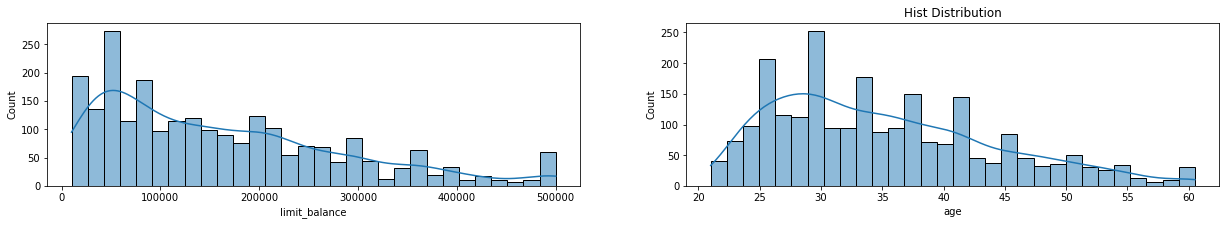

In [51]:
fig, ax =plt.subplots(1,2, figsize = (21,3))
sns.histplot(X_train['limit_balance'], bins=30, kde=True, ax=ax[0])
sns.histplot(X_train['age'], bins=30, kde=True, ax=ax[1])
plt.title('Hist Distribution')

Text(0.5, 1.0, 'Hist Distribution')

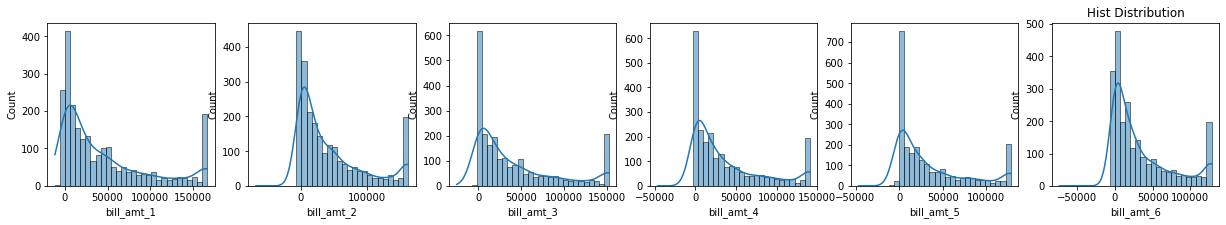

In [52]:
fig, ax =plt.subplots(1,6, figsize = (21,3))
sns.histplot(X_train['bill_amt_1'], bins=30, kde=True, ax=ax[0])
sns.histplot(X_train['bill_amt_2'], bins=30, kde=True, ax=ax[1])
sns.histplot(X_train['bill_amt_3'], bins=30, kde=True, ax=ax[2])
sns.histplot(X_train['bill_amt_4'], bins=30, kde=True, ax=ax[3])
sns.histplot(X_train['bill_amt_5'], bins=30, kde=True, ax=ax[4])
sns.histplot(X_train['bill_amt_6'], bins=30, kde=True, ax=ax[5])
plt.title('Hist Distribution')

Text(0.5, 1.0, 'Hist Distribution')

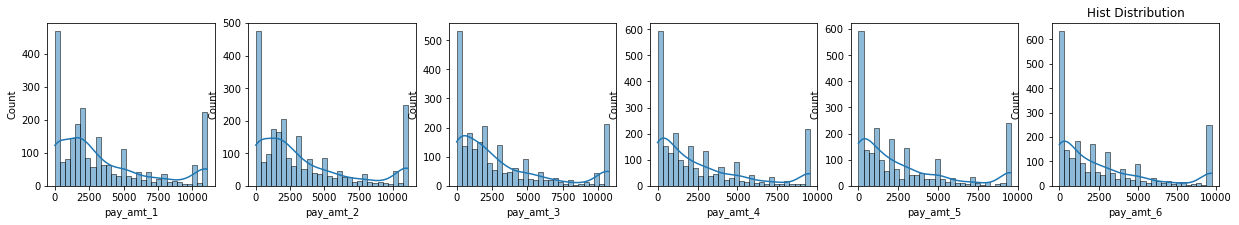

In [53]:
fig, ax =plt.subplots(1,6, figsize = (21,3))
sns.histplot(X_train['pay_amt_1'], bins=30, kde=True, ax=ax[0])
sns.histplot(X_train['pay_amt_2'], bins=30, kde=True, ax=ax[1])
sns.histplot(X_train['pay_amt_3'], bins=30, kde=True, ax=ax[2])
sns.histplot(X_train['pay_amt_4'], bins=30, kde=True, ax=ax[3])
sns.histplot(X_train['pay_amt_5'], bins=30, kde=True, ax=ax[4])
sns.histplot(X_train['pay_amt_6'], bins=30, kde=True, ax=ax[5])
plt.title('Hist Distribution')

Based on the graph, all the numerical are clean from outlier because previously the outliers had been handled but the distribution still not normal. So for scaling, later we will using minmax scaler. There are also ordinal categorical data from the train but we will not encode those categorical data since the data already in the form of scale.

In [54]:

num_minmax_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                             MinMaxScaler()
                             )

# Merging scaling/encoding with column which need to be scaling/encoding

data_pipeline = ColumnTransformer([
    ('pipeline_numerik', num_minmax_pipeline, num_columns)
    # , ('pipeline_kategorik', cat_ord_pipeline, cat_columns)
])


# 6 - Model Definition

Perform model training using the default parameters (base model) of each requested algorithm. On Naive Bayes, the algorithm used is BernoulliNB because this algorithn good at handling binary. As for the SVM for classifying the algorithm used is SVC. Last model for additional model, we will the Neural Network classification algorithm. Althought this model used in deep learning, This method can be used for classifying. The specific algorithm used for Neural Network Classification is MLP Classification.

In [55]:
final_log_reg_pipeline_default = make_pipeline(data_pipeline, LogisticRegression())
final_knn_pipeline_default = make_pipeline(data_pipeline, KNeighborsClassifier())
final_nb_pipeline_default = make_pipeline(data_pipeline, BernoulliNB())
final_svc_pipeline_default = make_pipeline(data_pipeline, SVC())
final_desc_tree_pipeline_default = make_pipeline(data_pipeline, DecisionTreeClassifier())
final_rndm_forest_pipeline_default = make_pipeline(data_pipeline, RandomForestClassifier())

#Honorary Model
final_mlp_class_pipeline_default = make_pipeline(data_pipeline, MLPClassifier())

## Finding the `mean` and `std` accuracy of each model with `cross_val_score`

Because y class is imbalance, the cross validation used for this scheme is K_Fold with K choosen is 10 since according to data mining experts, model testing or model validation the best K value is 10.

In [56]:
X_train

,limit_balance,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
2122,200000.0,1.0,1.0,42.0,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
804,30000.0,2.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,23134.0,23302.0,22844.0,22101.0,19535.0,19580.0,1712.0,1400.0,442.0,391.0,500.0,0.0
1693,20000.0,1.0,2.0,30.0,1.0,2.0,2.0,-1.0,0.0,-1.0,11730.0,7221.0,0.0,3041.0,3041.0,1326.0,1712.0,0.0,3041.0,0.0,1326.0,0.0
2569,30000.0,2.0,2.0,22.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,174.0,1995.0,3530.0,0.0,5960.0,0.0,1995.0,3530.0,0.0,5960.0,0.0,1778.0
790,470000.0,1.0,2.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,72083.0,68136.0,69036.0,71466.0,67538.0,70400.0,5031.0,5500.0,5000.0,5000.0,4000.0,5000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,50000.0,2.0,2.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,42856.0,29248.0,17775.0,17833.0,18246.0,18642.0,1300.0,1600.0,650.0,700.0,700.0,700.0
2790,200000.0,2.0,1.0,36.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2500.0,0.0,5448.0,632.0,0.0,646.0,0.0,5448.0,632.0,0.0,646.0,0.0
74,60000.0,2.0,2.0,24.0,0.0,0.0,-1.0,2.0,0.0,0.0,8086.0,6936.0,4102.0,3891.0,4669.0,6083.0,3015.0,4102.0,0.0,1000.0,1500.0,1000.0
2224,100000.0,1.0,1.0,34.0,1.0,-2.0,-2.0,-2.0,-2.0,-1.0,0.0,0.0,0.0,0.0,0.0,315.0,0.0,0.0,0.0,0.0,315.0,165.0


In [57]:
kfold = KFold(n_splits=10, random_state=None, shuffle=False)

scores_log_reg_default_kfold = cross_val_score(final_log_reg_pipeline_default, X_train, y_train, cv=kfold)
scores_knn_default_kfold = cross_val_score(final_knn_pipeline_default, X_train, y_train, cv=kfold)
scores_nb_default_kfold = cross_val_score(final_nb_pipeline_default, X_train, y_train, cv=kfold)
scores_svc_default_kfold = cross_val_score(final_svc_pipeline_default, X_train, y_train, cv=kfold)
scores_desc_tree_default_kfold = cross_val_score(final_desc_tree_pipeline_default, X_train, y_train, cv=kfold)
scores_rndm_forest_default_kfold = cross_val_score(final_rndm_forest_pipeline_default, X_train, y_train, cv=kfold)
scores_mlp_class_default_kfold = cross_val_score(final_mlp_class_pipeline_default, X_train, y_train, cv=kfold)

/Users/shafiralaksitasari/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/shafiralaksitasari/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/shafiralaksitasari/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/shafiralaksitasari/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

In [58]:
cross_val_kfold_result = pd.DataFrame(columns=["Model", "Accuracy Mean", "Accuracy Stdev"], 
                                data=[['Logistic Regression',scores_log_reg_default_kfold.mean(), scores_log_reg_default_kfold.std()],
                                    ['KNN',scores_knn_default_kfold.mean(), scores_knn_default_kfold.std()],
                                    ['Naive Bayes',scores_nb_default_kfold.mean(), scores_nb_default_kfold.std()],
                                    ['SVM',scores_svc_default_kfold.mean(), scores_svc_default_kfold.std()],
                                    ['Decision Tree',scores_desc_tree_default_kfold.mean(), scores_desc_tree_default_kfold.std()],
                                    ['Random Forest',scores_rndm_forest_default_kfold.mean(), scores_rndm_forest_default_kfold.std()],
                                    ['Neural Network',scores_mlp_class_default_kfold.mean(), scores_mlp_class_default_kfold.std()]
                                    ])


cross_val_kfold_result


,Model,Accuracy Mean,Accuracy Stdev
0,Logistic Regression,0.790598,0.027466
1,KNN,0.770725,0.029597
2,Naive Bayes,0.742806,0.031195
3,SVM,0.790174,0.027337
4,Decision Tree,0.691626,0.029962
5,Random Forest,0.793569,0.031937
6,Neural Network,0.792296,0.026165


From the accuracy mean prespective, the highest accuracy is belong to the Random forest, while from the accuracy standard deviation prespective, the lowest also belong to Random Forest. Therefore, the model that will be chosen is the model with the highest mean accuracy, namely Random Forest. The standard deviation of accuracy indicates the consistency of the accuracy, i.e. the smaller it is, the more consistent it is. In comparison, the standard deviation difference can be said to be not too significant so either way if there are any model with lowest standard deviation it will not matter. The Random forest model has the following accuracy:

In [59]:
chhosen_model_acc_mean = cross_val_kfold_result[(cross_val_kfold_result['Model'] == 'Random Forest')]['Accuracy Mean']
chhosen_model_acc_std = cross_val_kfold_result[(cross_val_kfold_result['Model'] == 'Random Forest')]['Accuracy Stdev']

print('The accuracy of the selected model is between ', float(chhosen_model_acc_mean - chhosen_model_acc_std), 'and ', float(chhosen_model_acc_mean + chhosen_model_acc_std))

The accuracy of the selected model is between  0.7616321768657078 and  0.8255057763632129


# 7 - Model Training

In [60]:
# Training using Logistic Regression with default parameter

final_rndm_forest_pipeline_default.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline_numerik',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['limit_balance', 'age',
                                                   'pay_amt_1', 'pay_amt_2',
                                                   'bill_amt_1', 'bill_amt_2',
                                                   'bill_amt_3', 'bill_amt_4',
                                                   'bill_amt_5', 'bill_amt_6',
                                                   'pay_amt_3', 'pay_amt_4',
                                                   'pay_amt_5',
       

In [61]:
# Training using Logistic Regression with Grid Search 


new_parameter = {
                'criterion':['gini','entropy'],
                'n_estimators': [10, 100, 1000],
}

gridsearchcv = GridSearchCV(RandomForestClassifier(), new_parameter,
                          return_train_score=True)
                          
grid_search = make_pipeline(data_pipeline, gridsearchcv)
best_model = grid_search.fit(X_train, y_train)


In [62]:
print("Best parameters: {}".format(gridsearchcv.best_params_))
print("Best cross-validation score: {:.2f}".format(gridsearchcv.best_score_))

Best parameters: {'criterion': 'gini', 'n_estimators': 100}
Best cross-validation score: 0.79


# 8 - Model Evaluation

Performing model evaluation in both default and grid searched model.

Random Forest accuracy score train :  0.9978849407783418
Random Forest accuracy score test :  0.7681895093062606 

Random Forest classification report train : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1868
           1       0.99      1.00      0.99       496

    accuracy                           1.00      2364
   macro avg       1.00      1.00      1.00      2364
weighted avg       1.00      1.00      1.00      2364
 

Random Forest classification report test : 
               precision    recall  f1-score   support

           0       0.79      0.96      0.86       455
           1       0.49      0.14      0.22       136

    accuracy                           0.77       591
   macro avg       0.64      0.55      0.54       591
weighted avg       0.72      0.77      0.72       591

Random Forest Confusion matrix - Train (Left) and Test(Right)


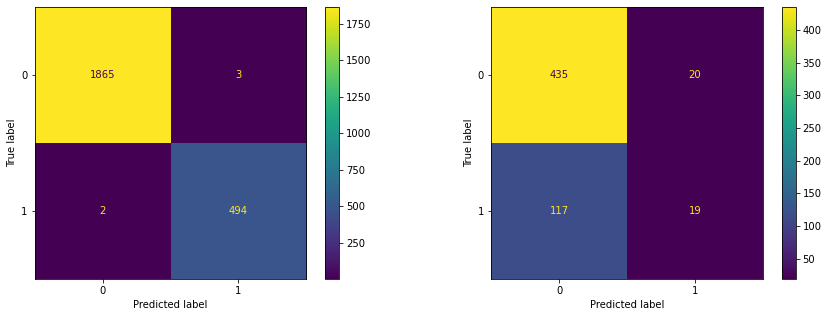

In [63]:
# Predict Default Random Forest model

rndm_forest_y_pred_train_default = final_rndm_forest_pipeline_default.predict(X_train)
rndm_forest_y_pred_test_default = final_rndm_forest_pipeline_default.predict(X_test)

# Display Default Random Forest Accuracy

print('Random Forest accuracy score train : ',accuracy_score(y_train,rndm_forest_y_pred_train_default))
print('Random Forest accuracy score test : ',accuracy_score(y_test,rndm_forest_y_pred_test_default),'\n')

# Display Default Random Forest Classification Report

print('Random Forest classification report train : \n',classification_report(y_train,rndm_forest_y_pred_train_default),'\n')
print('Random Forest classification report test : \n',classification_report(y_test,rndm_forest_y_pred_test_default))

# Display Default Random Forest Confusion matrix - Train (Left) and Test(Right)

print('Random Forest Confusion matrix - Train (Left) and Test(Right)')

fig, ax =plt.subplots(1,2, figsize = (15,5))
cm_rndm_forest_train = confusion_matrix(y_train, rndm_forest_y_pred_train_default, labels=final_rndm_forest_pipeline_default.classes_)
disprndm_forest_train = ConfusionMatrixDisplay(confusion_matrix=cm_rndm_forest_train,display_labels=final_rndm_forest_pipeline_default.classes_)
disprndm_forest_train.plot(ax=ax[0])
cm_rndm_forest_test = confusion_matrix(y_test, rndm_forest_y_pred_test_default, labels=final_rndm_forest_pipeline_default.classes_)
disp_rndm_forest_test = ConfusionMatrixDisplay(confusion_matrix=cm_rndm_forest_test,display_labels=final_rndm_forest_pipeline_default.classes_)

disp_rndm_forest_test.plot(ax=ax[1])
plt.show()

Best Model accuracy score train :  0.9978849407783418
Best Model accuracy score test :  0.7698815566835872 

Best Model classification report train : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1868
           1       1.00      0.99      0.99       496

    accuracy                           1.00      2364
   macro avg       1.00      1.00      1.00      2364
weighted avg       1.00      1.00      1.00      2364
 

Best Model classification report test : 
               precision    recall  f1-score   support

           0       0.79      0.95      0.86       455
           1       0.50      0.16      0.24       136

    accuracy                           0.77       591
   macro avg       0.65      0.56      0.55       591
weighted avg       0.72      0.77      0.72       591

Best Model Confusion matrix - Train (Left) and Test(Right)


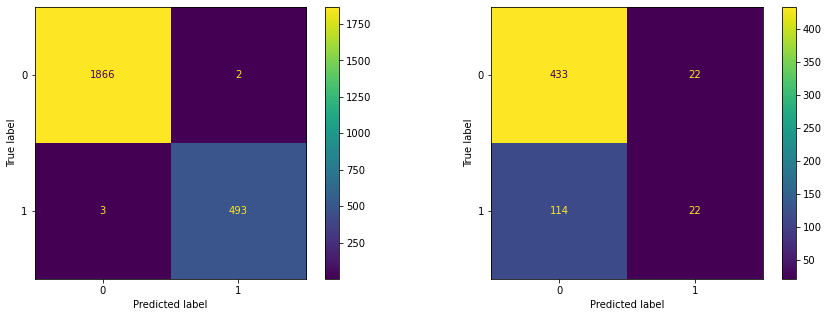

In [64]:
# Predict Best Model model

best_model_y_pred_train_grid = grid_search.predict(X_train)
best_model_y_pred_test_grid = grid_search.predict(X_test)

# Display Best Model Accuracy

print('Best Model accuracy score train : ',accuracy_score(y_train,best_model_y_pred_train_grid))
print('Best Model accuracy score test : ',accuracy_score(y_test,best_model_y_pred_test_grid),'\n')

# Display Best Model Classification Report

print('Best Model classification report train : \n',classification_report(y_train,best_model_y_pred_train_grid),'\n')
print('Best Model classification report test : \n',classification_report(y_test,best_model_y_pred_test_grid))

# Display Best Model Confusion matrix - Train (Left) and Test(Right)

print('Best Model Confusion matrix - Train (Left) and Test(Right)')

fig, ax =plt.subplots(1,2, figsize = (15,5))
cm_best_model_train = confusion_matrix(y_train, best_model_y_pred_train_grid, labels=best_model.classes_)
dispbest_model_train = ConfusionMatrixDisplay(confusion_matrix=cm_best_model_train,display_labels=best_model.classes_)
dispbest_model_train.plot(ax=ax[0])
cm_best_model_test = confusion_matrix(y_test, best_model_y_pred_test_grid, labels=best_model.classes_)
disp_best_model_test = ConfusionMatrixDisplay(confusion_matrix=cm_best_model_test,display_labels=best_model.classes_)
disp_best_model_test.plot(ax=ax[1])
plt.show()


In the default model, it can be said that the Random forest default model is very overfit when computed from its accuracy. Meanwhile, when computed from the precision and recall, the models in each test are also very over-fit. Similiar with F1 scores. Based on the default parameters, the train is good but the classification results on the test are still poor. Judging from the results, the successful model can only predict category 1 as many as 21 people even though the actual number of category 1 is 136 people. The difference can be up to 5 times. If this allowed, especially in this case determining the credit card default, the bank will be on the verge of loss because the person who stop making required payment on a loan/debt is predicted  making required payment on a loan/debt.
Overfitting also occurs in Random Forest with hyperparameter tuning. The resulting score is not even much different from the default model. Tha false in the test even more increasing. It can also be concluded that this new model also does not provide a solution in equalizing the fitting values, especially from the accuracy, precision, recall, and F1 score. From the case of determining the credit card default that has been described in the previous default model, to avoid big losses by the bank, it is necessary to increase the recall on the value 'yes'. Here is one of the way to increase the 'yes' value with parameter threshold.

Best Model classification report train : 
               precision    recall  f1-score   support

           0       1.00      0.90      0.95      1868
           1       0.73      1.00      0.85       496

    accuracy                           0.92      2364
   macro avg       0.87      0.95      0.90      2364
weighted avg       0.94      0.92      0.93      2364
 

Best Model classification report test : 
               precision    recall  f1-score   support

           0       0.87      0.39      0.54       455
           1       0.28      0.80      0.42       136

    accuracy                           0.49       591
   macro avg       0.58      0.60      0.48       591
weighted avg       0.73      0.49      0.51       591

Best Model Confusion matrix - Train (Left) and Test(Right)


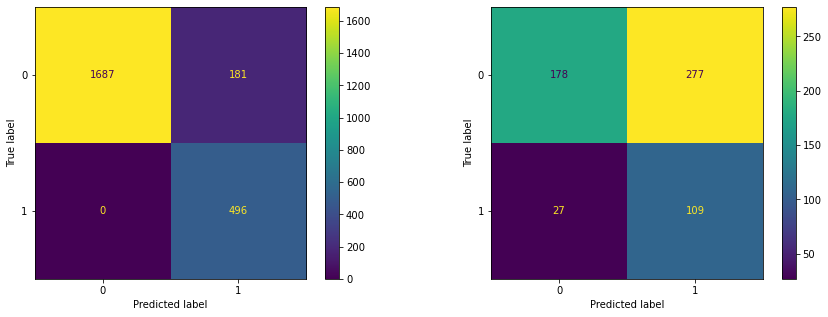

In [73]:
threshold = 0.15

predicted_proba1 = best_model.predict_proba(X_train)
predicted_proba2 = best_model.predict_proba(X_test)
predicted1 = (predicted_proba1 [:,1] >= threshold).astype('int')
predicted2 = (predicted_proba2 [:,1] >= threshold).astype('int')

# Display Best Model Classification Report

print('Best Model classification report train : \n',classification_report(y_train,predicted1),'\n')
print('Best Model classification report test : \n',classification_report(y_test,predicted2))

# Display Best Model Confusion matrix

print('Best Model Confusion matrix - Train (Left) and Test(Right)')

fig, ax =plt.subplots(1,2, figsize = (15,5))
cm_best_model_train = confusion_matrix(y_train, predicted1, labels=best_model.classes_)
dispbest_model_train = ConfusionMatrixDisplay(confusion_matrix=cm_best_model_train,display_labels=best_model.classes_)
dispbest_model_train.plot(ax=ax[0])
cm_best_model_test = confusion_matrix(y_test,predicted2, labels=best_model.classes_)
disp_best_model_test = ConfusionMatrixDisplay(confusion_matrix=cm_best_model_test,display_labels=best_model.classes_)
disp_best_model_test.plot(ax=ax[1])



From the new confusion matrix above, it can be seen that the yes/1 value is now larger compared to previous model in both train and test. Even so, the data which detected as 1 but should be 0 also inrease. This resulted in the person who    , it was detected that he did not pay the loan. If  some cases we want to reduce the loss then this can be an initial appeal before further inspection. 

# 9 - Model Inference

Inference model will be done with gridsearch result model without reducing the threshold.

In [66]:
df_column = X_train.columns.tolist()
inf_predict = df_inf[df_column]

In [67]:
# Predict best model

df_pred_result = pd.DataFrame(grid_search.predict(inf_predict), columns=['default_payment_next_month - Prediction'])
df_pred_result

,default_payment_next_month - Prediction
0,0
1,0
2,1
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [68]:
# Concate table

df_inf_with_pred = pd.concat([df_inf, df_pred_result], axis = 1)
df_inf_with_pred

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month,default_payment_next_month - Prediction
0,400000.0,2,1,2,30.0,0.0,0.0,0.0,0.0,0.0,0.0,139862.0,125280.0,109278.0,94511.0,64995.0,28654.0,9209.0,3807.0,2403.0,1933.0,1014.0,104078.0,0,0
1,340000.0,1,1,2,44.0,0.0,0.0,0.0,0.0,0.0,0.0,83059.0,85634.0,73950.0,59324.0,156094.0,110234.0,20000.0,5000.0,2000.0,112000.0,4234.0,4000.0,1,0
2,20000.0,1,2,2,36.0,0.0,0.0,2.0,2.0,3.0,2.0,11423.0,13976.0,13455.0,15227.0,14699.0,14313.0,2749.0,0.0,2000.0,0.0,0.0,1230.0,0,1
3,100000.0,2,1,1,36.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,16155.0,3514.0,3400.0,15156.0,13920.0,2099.0,3514.0,3400.0,15156.0,13920.0,2099.0,15638.0,0,0
4,70000.0,1,3,1,46.0,2.0,2.0,2.0,2.0,2.0,2.0,29258.0,31137.0,32855.0,33316.0,34137.0,33439.0,2352.0,2531.0,1300.0,1500.0,0.0,1400.0,1,0
5,430000.0,2,1,2,38.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,590.0,590.0,590.0,590.0,590.0,590.0,590.0,590.0,590.0,590.0,590.0,590.0,0,0
6,90000.0,2,3,1,33.0,0.0,0.0,0.0,0.0,0.0,0.0,86960.0,85585.0,87235.0,84511.0,84488.0,86184.0,3200.0,3114.0,3000.0,3100.0,3100.0,3500.0,1,0
7,30000.0,2,2,2,28.0,0.0,0.0,0.0,0.0,2.0,2.0,28347.0,29880.0,29588.0,30687.0,25637.0,26468.0,2000.0,2000.0,2200.0,0.0,1800.0,0.0,0,0
8,300000.0,2,2,1,42.0,0.0,0.0,0.0,0.0,0.0,0.0,281000.0,291482.0,297425.0,296884.0,241037.0,247383.0,15000.0,12039.0,13000.0,9000.0,10059.0,10000.0,0,0
9,170000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0.0,0.0,171160.0,187853.0,171095.0,137986.0,141319.0,139463.0,13000.0,6154.0,15000.0,6000.0,7000.0,5000.0,0,0


In [69]:
# Result comparison

df_inf_with_pred[['default_payment_next_month','default_payment_next_month - Prediction']]

,default_payment_next_month,default_payment_next_month - Prediction
0,0,0
1,1,0
2,0,1
3,0,0
4,1,0
5,0,0
6,1,0
7,0,0
8,0,0
9,0,0


Judging from the actual results and predictions, it can be said that 4 data were misclassified. This is one of the validations that the model tunning using the grid search previously has not been able to classify the data correctly so further experiments are required.

In [70]:
X_train.columns

Index(['limit_balance', 'education_level', 'marital_status', 'age', 'pay_1',
       'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2',
       'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1',
       'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6'],
      dtype='object')

# 11 - Conclusion

Based on Exploratory Data Analysis, 

- Credit card defaults occur when people become very delinquent on the credit card payments. In the default payment next month, total of value No is 2330 while total of value Yes is 635. It means there are 635 people stop making required payment on a loan/debt while the rest is still pay the required loan/debt on time. From the difference in the amount the data can be categorized as imbalanced data.
- Mostly, in the dataset, female are more likely to do loan/debt more than male. But if based on the propotion, male most likely failed to pay the loan. The precentage of woman who paid their loan is 79,3% while the precentage of male who paid their loan is 77,4%.
- Most of the default payments, which are yes and no, mostly happen by university or undergraduates, followed by graduate schools, high schools, unknowns, and others. It is possible that the university is usually the level of education that most people desired. The expenses can be a lot because the majority of them go to college as requirement of decent job along with carrying large of student loans. Also after graduation there are many other expenses such as housing, vehicles, staple goods or even some of them decide to have families. This also applies to those from graduate school. It is quite impressive the amount of graduate school (master) almost in the same amount from university. Besides that, there are some ambiguous values. It is not known what falls into the other category, it could be pre-school, middle school, no school, and others. 
- In marital status, the most default payment owner fall to single people while the lowest is others. It is still not known what the other means, such as whether widowed, divorced, separated, registered partnerships are included in this category.
- the age does not affect the balance limit. It can be proven from the distribution of the points above which is quite random. Another factors such as income, creditworthiness, payment history, an others factor may affect personal limit balance.
- Then the interpretation can be that mostly people paid their loan/debt to bank on time. Some of them paid the due even earlier.  Most people prefer to not getting any additional charge.
- There have been additional bill statements during the last 6 months. When examined, there are significant changes from April and September. This means the number of bills from month to month for each person is getting larget.
- the amount of previous payments in April to September graphically decreased and increased. In the chart above, we can see that the month of April the amount paid up to June. However, it increased dramatically from June to September.

Based on Model Analysis,

Previously the features used to predict default payment were 'limit_balance','education_level', 'marital_status', 'age', 'pay_1','pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2','bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1','pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', and 'pay_amt_6'. Then some of its continuous numerical features were scaled with minmax scalar. Because the categories are already numbers, there is no need to encode the categorical data.
After pperforming cross validation, from the 6 models : Logistic Regression, KNN, Naive Bayes, SVM, Decision Tree, Random Forest, and Neural Network, the Random Forest model with the highest mean accuracy was chosen, therefore Random Forest was the next to be investigated further by Grid Search. With Grid Search we get Best parameters: {'criterion': 'gini', 'n_estimators': 1000} with a best score of 0.79. When compared with the default model, there is almost no difference in performance matrices between the two models even with the model using grid search the F1 score is decreasing. Therefore, it is recommended that the default model is used for modelling. However, to increase the recall, it is recommended to reduce the threshold. 

This way can assist bank to avoid any unexpected loss when predicting default payment for next month. 

However, Because the current model is still not ideal, trial and error needs to be done with other parameters such as max_depth, min_samples_split, adding n_estimator, and others in order to get a more accurate model. Or if necessary, other algorithms such as Decision Tree, KNN, SVM and others can be tried to be explored further.

## 1. What is the criterion parameter function in the Decision Tree? Explain one criterion that you understand!

In the dcision tree there are 3 kinds of criterion, namely “gini”, “entropy”, and “log_loss”. This parameter serves to determine how the impurity of a split will be measured. Gini and entropy are measures of impurity of a node. The range of Entropy in between 0 to 1 and the range of Gini Impurity in between 0 to 0.5. 

Gini impurity is calculated by dividing several target values (for example yes or no), then calculating how many each yes or no number corresponds to the dataset. After calculating the number of each target value, calculate the probability for each yes or no using the formula Gini Impurity.

<img src = 'https://wikimedia.org/api/rest_v1/media/math/render/svg/dd9588bfbd427cc269d54e7cafcd74758289075b'>

Then this is done on all nodes so that only the leaves remain, resulting in pure Gini impurity (one of the target values is 0).

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

## 2. What is the function of pruning in the Tree model?

Decision Tree often to overfit towards the data train. To avoid this common problem, pruning can become as a solver. Pruning is used to removing several parts of the tree which not consider as critical. This done by cutting off several unicritical nodes to directly become leaf on decision tree model. By doing this pruning will certainly increase the error. In the sickit learn there is ccp_alpha (Cost Complexity Pruning Alpha) hyperparameter, this is one of the type to perform pruning to determine the degree of complexity of a decision tree (alpha).

https://www.displayr.com/machine-learning-pruning-decision-trees/



## 3. How to choose the optimal K on KNN?

K indicates that the set of points is split into K groups (clusters), with the points in each group being more closely spaced apart. There is no statistical technique do determine the exact number. So as a starter K can be selected by choosing large K value to smoothening decision boundaries (because small K value will lead to unstable decision boundaries). Also odd K value is preferable. This is due to avoid tie in between choosing the class. If necessary, create the plot to choose which K value which having a minimum error rate.

https://stackoverflow.com/questions/11568897/value-of-k-in-k-nearest-neighbor-algorithm
https://medium.com/swlh/k-nearest-neighbor-ca2593d7a3c4


## 4. Explain what do you know about Cross Validation!

Cross validation is done to evaluate the performance of the model to reduce overfitting. When validating with cross validation, the data is divided into train and test. It is called 'cross' because after the data tested a cross process is carried out where the tested data then used as training data or vice versa, the previous training data is now used as test data. One of the most frequently used cross validation schemes is the K-Fold. K-fold conducts experiments k times for one model with the same parameters (eg k=10, so iterations are 10 times). The process for each iteration is the same, namely by dividing the training data and testing data, then each of these experiments obtains the evaluation results such as accuracy.

https://machinelearningmastery.com/k-fold-cross-validation/

## 5. Explain what you know about Accuracy, Precision, Recall, F1 Score!

<img src = "https://www.tutorialexample.com/wp-content/uploads/2022/01/how-to-compute-accuracy-precision-recall-and-f1-score-in-machine-learning.png" >

Accuracy, Precision, Recall, F1 Score are part of the classification metrics. Each formula can be seen in the image above. It will be easier to calculate it if it is presented in the form of a Confusion Matrix where the number of True Positives, False Positives, True Negatives, and False Negatives can be directly presented. True is where the prediction results match the actual results, False is where the prediction results are not the same as the actual results. Depending on the case, the positive and negative labels may vary. For example, it can be seen the calculation of Accuracy, Precision, Recall, F1 Score according to the confusion matrix obtained previously.

<Figure size 720x720 with 0 Axes>

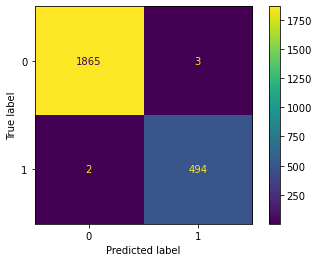

In [71]:
plt.figure(figsize = (10,10))
cm_rndm_forest_train = confusion_matrix(y_train, rndm_forest_y_pred_train_default, labels=final_rndm_forest_pipeline_default.classes_)
disprndm_forest_train = ConfusionMatrixDisplay(confusion_matrix=cm_rndm_forest_train,display_labels=final_rndm_forest_pipeline_default.classes_)
disprndm_forest_train.plot()

IFor example f we want to calculate from the value 0 (No), the True Positive is 1866 (Predict 0 True 0), the False Positive is 3 (Predict 0 True 1), the True Negative is 493 (Predict 1 True 1), and the False negative is 2(Predict 1 True 1). So if it is calculated with the previous formula then:

In [72]:
print('0 Accuracy : ', ((1866+493) / (1866+493+3+2)) )
print('0 precision : ', ((1866)/(1866+3)) )
print('0 Recall : ', ((1866)/(1866+2)) )
print('0 F1 score : ', (( 2 * ((1866)/(1866+3)) * ((1866)/(1866+2)) ) / ( ((1866)/(1866+2)) + ((1866)/(1866+3)) )) )

0 Accuracy :  0.9978849407783418
0 precision :  0.9983948635634029
0 Recall :  0.9989293361884368
0 F1 score :  0.9986620283649986


The calculation is also carried out on Value 1. These metrices used to display performance for current model, but since our current data is imbalance, the most suitable metrices to evaluate the performances is F1 score because F1 score compute overall performance in each class.

https://www.tutorialexample.com/an-introduction-to-accuracy-precision-recall-f1-score-in-machine-learning-machine-learning-tutorial/